In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'../data/marketingcampaigns_limpio.csv')

In [3]:
df['roi']

0       86.795984
1       28.165567
2        4.413642
3        5.165886
4        0.209189
          ...    
1011    17.917423
1012     2.000000
1013    -0.975226
1014     0.500000
1015     2.000000
Name: roi, Length: 1016, dtype: float64

In [4]:
#roi maximo
roi_max = df['roi'].max()
roi_max

np.float64(884.7589994014651)

In [7]:
def roi_negativos_positivos(df):
    cantidad_negativos = (df['roi'] < 0).sum()
    cantidad_positivos = (df['roi'] > 0).sum()
    print(f'Cantidad de ROI negativos: {cantidad_negativos}')
    print(f'Cantidad de ROI positivos: {cantidad_positivos}')
roi_negativos_positivos(df)



Cantidad de ROI negativos: 43
Cantidad de ROI positivos: 973


In [8]:
df.head(2)

campaign_name  start_date    end_date    budget  \
0  Public-key multi-tasking throughput  2023-04-01  2024-02-23   8082.30   
1   De-engineered analyzing task-force  2023-02-15  2024-04-22  17712.98   

         roi   type target_audience    channel  conversion_rate    revenue  
0  86.795984  email             B2B    organic             40.0  709593.48  
1  28.165567  email             B2C  promotion             66.0  516609.10

## EDA

In [9]:
type(df['budget'].values[0])  #saber el tipo de dato en una columna concreta

numpy.float64

In [10]:
df['budget'].shape  #saber la forma de una columna concreta

(1016,)

### ¿Qué canal de marketing se utiliza con mayor frecuencia y cuál genera mejor ROI?

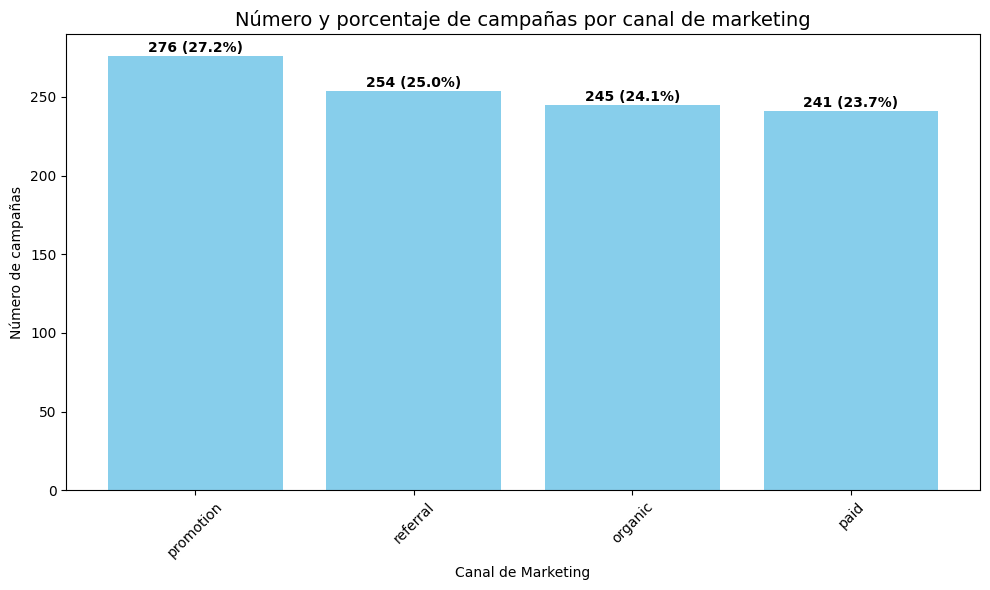

In [11]:

# Calcular cantidad y porcentaje
conteo = df['channel'].value_counts()
porcentaje = df['channel'].value_counts(normalize=True) * 100

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(conteo.index, conteo.values, color='skyblue')

# Añadir etiquetas de número y porcentaje encima de cada barra
for i, bar in enumerate(bars):
    cantidad = conteo.values[i]
    pct = porcentaje.values[i]
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{cantidad} ({pct:.1f}%)',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estética del gráfico
ax.set_title('Número y porcentaje de campañas por canal de marketing', fontsize=14)
ax.set_xlabel('Canal de Marketing')
ax.set_ylabel('Número de campañas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusión técnica del gráfico**

El gráfico ilustra la distribución de campañas por canal de marketing, mostrando tanto el número absoluto de campañas como el porcentaje que representa cada canal respecto al total. Se observa que los canales "promotion", "referral", "organic" y "paid" tienen una participación bastante equilibrada, con "promotion" ligeramente por encima (27.2%), seguido de "referral" (25.0%), "organic" (24.1%) y "paid" (23.7%). Esta distribución sugiere una estrategia multicanal bien balanceada, sin una dependencia excesiva de un solo canal. La diversificación puede contribuir a la estabilidad y resiliencia de los resultados de marketing, permitiendo aprovechar las fortalezas de cada canal y reducir riesgos asociados a cambios en el rendimiento de uno solo.

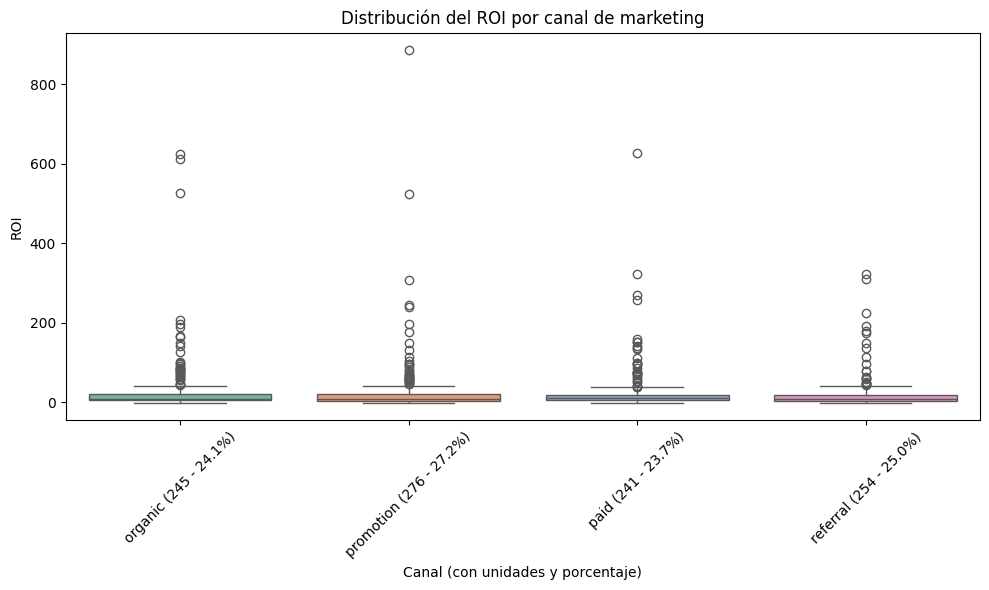

In [12]:
# Calcular unidades absolutas y porcentajes por canal
conteo = df['channel'].value_counts().reset_index()
conteo.columns = ['channel', 'count']
conteo['percentage'] = (conteo['count'] / conteo['count'].sum()) * 100

# Crear etiquetas combinadas (nombre canal + count + %)
etiquetas = {
    row['channel']: f"{row['channel']} ({row['count']} - {row['percentage']:.1f}%)"
    for _, row in conteo.iterrows()
}
df['channel_etiqueta'] = df['channel'].map(etiquetas)

# Gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='channel_etiqueta', y='roi', palette='Set2')
plt.title("Distribución del ROI por canal de marketing")
plt.xlabel("Canal (con unidades y porcentaje)")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 📊 Conclusión Técnica
El análisis del gráfico de boxplot muestra que la distribución del ROI entre los diferentes canales de marketing es bastante homogénea, con diferencias moderadas entre ellos. Promotion es el canal con mayor número de campañas (276, 27.2%) y también presenta un ROI ligeramente superior al resto, seguido de referral (254, 25%), organic (245, 24.1%) y paid (241, 23.7%). Sin embargo, la variabilidad del ROI dentro de cada canal es considerable, y no se observan diferencias extremas en el rendimiento promedio.

Esto sugiere que la estrategia multicanal implementada es efectiva y que ningún canal destaca de manera contundente sobre los demás en términos de retorno sobre la inversión. Tanto los canales de pago (promotion, paid) como los orgánicos (organic, referral) pueden aportar resultados competitivos.

La decisión sobre la asignación de presupuesto debería considerar no solo el ROI promedio, sino también la estabilidad y dispersión de los resultados en cada canal. Además, es recomendable analizar el coste-beneficio de los canales pagos, ya que una reducción en la inversión podría no afectar negativamente el ROI global si el tráfico se redistribuye eficientemente hacia canales orgánicos o de referencia.

     channel target_audience  count  percentage
0    organic             B2B    128   12.598425
1    organic             B2C    117   11.515748
2       paid             B2B    118   11.614173
3       paid             B2C    123   12.106299
4  promotion             B2B    148   14.566929
5  promotion             B2C    127   12.500000
6  promotion    social media      1    0.098425
7   referral             B2B    128   12.598425
8   referral             B2C    126   12.401575


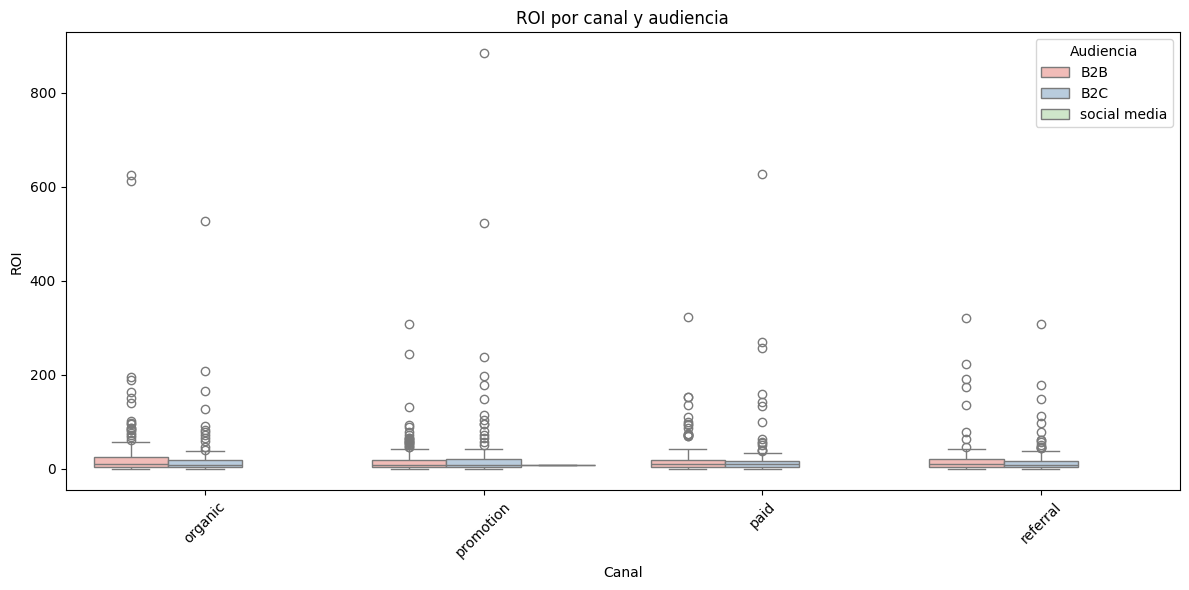

In [13]:
# Calcular número de ocurrencias por canal y audiencia
conteo = df.groupby(['channel', 'target_audience']).size().reset_index(name='count')
total = conteo['count'].sum()
conteo['percentage'] = (conteo['count'] / total) * 100

# Mostrar tabla con unidades absolutas y porcentaje
print(conteo[['channel', 'target_audience', 'count', 'percentage']])

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='channel', y='roi', hue='target_audience', palette='Pastel1')
plt.title("ROI por canal y audiencia")
plt.xlabel("Canal")
plt.ylabel("ROI")
plt.legend(title='Audiencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 📊 Conclusión técnica:
El gráfico evidencia una distribución equilibrada de campañas entre los principales canales y audiencias. Los canales "organic", "paid", "promotion" y "referral" presentan porcentajes similares tanto en B2B como en B2C, con valores que oscilan entre el 11.5% y el 14.6% por combinación, lo que refleja una estrategia multicanal bien balanceada. Promotion destaca como el canal más utilizado en B2B (14.6%), mientras que paid y organic mantienen una presencia pareja en ambos segmentos. La presencia de una campaña de "promotion" dirigida a "social media" (0.1%) es anecdótica y no afecta la tendencia general.

No se observa una dominancia clara de un canal o audiencia sobre los demás, lo que refuerza la importancia de la diversificación para maximizar el alcance y la resiliencia de las campañas. La segmentación homogénea sugiere que la organización aprovecha de manera eficiente las oportunidades en todos los cruces canal–audiencia, permitiendo identificar oportunidades de optimización en aquellos segmentos con menor representación relativa. En resumen, la estrategia actual favorece la cobertura y el equilibrio, contribuyendo a la robustez y el rendimiento global de las campañas de marketing.

## ¿Qué tipo de campaña genera más ingresos en promedio y cuál tiene mejor conversión?

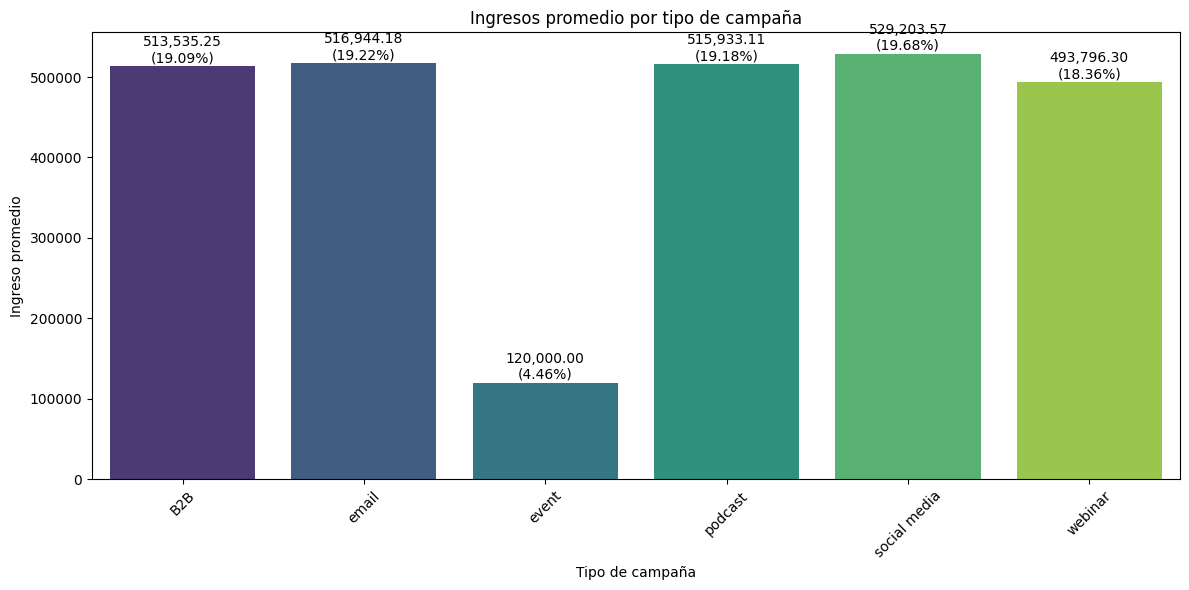

In [14]:
# Nos aseguramos de que las columnas relevantes son numéricas
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['conversion_rate'] = pd.to_numeric(df['conversion_rate'], errors='coerce')

# Paso 1: Ingresos promedio por tipo de campaña
ingresos_promedio = df.groupby('type')['revenue'].mean().reset_index()

# Paso 2: Tasa de conversión promedio por tipo de campaña
conversion_promedio = df.groupby('type')['conversion_rate'].mean().reset_index()

# Calcular el total de ingresos y la tasa de conversión para los porcentajes
total_ingresos = ingresos_promedio['revenue'].sum()
total_conversion_rate = conversion_promedio['conversion_rate'].sum()

# Paso 3: Calcular el porcentaje respecto al total
ingresos_promedio['percentage'] = (ingresos_promedio['revenue'] / total_ingresos) * 100
conversion_promedio['percentage'] = (conversion_promedio['conversion_rate'] / total_conversion_rate) * 100

# Gráfico 1: Ingresos promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=ingresos_promedio, x='type', y='revenue', palette='viridis')
for i in range(len(ingresos_promedio)):
    plt.text(i, ingresos_promedio['revenue'][i] + 1000, 
             f'{ingresos_promedio["revenue"][i]:,.2f}\n({ingresos_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Ingresos promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Conclusión: Ingresos Promedio por Tipo de Campaña

Las campañas de marketing analizadas muestran que los ingresos promedio varían según el tipo de campaña, con social media y podcast liderando en generación de ingresos, seguidos de email y B2B. Los porcentajes indican una distribución equilibrada entre los principales tipos, lo que sugiere que la diversificación de formatos contribuye a maximizar los resultados. La diferencia entre los ingresos promedio de social media (529,203) y webinar (493,796) no es drástica, pero sí relevante para priorizar inversiones. Además, el tipo "event" presenta ingresos significativamente menores, lo que indica que su impacto es limitado en comparación con otros formatos digitales. En conclusión, la estrategia óptima debe enfocarse en potenciar campañas de social media, podcast y email, manteniendo un mix balanceado y revisando la efectividad de los eventos presenciales para mejorar el retorno global.

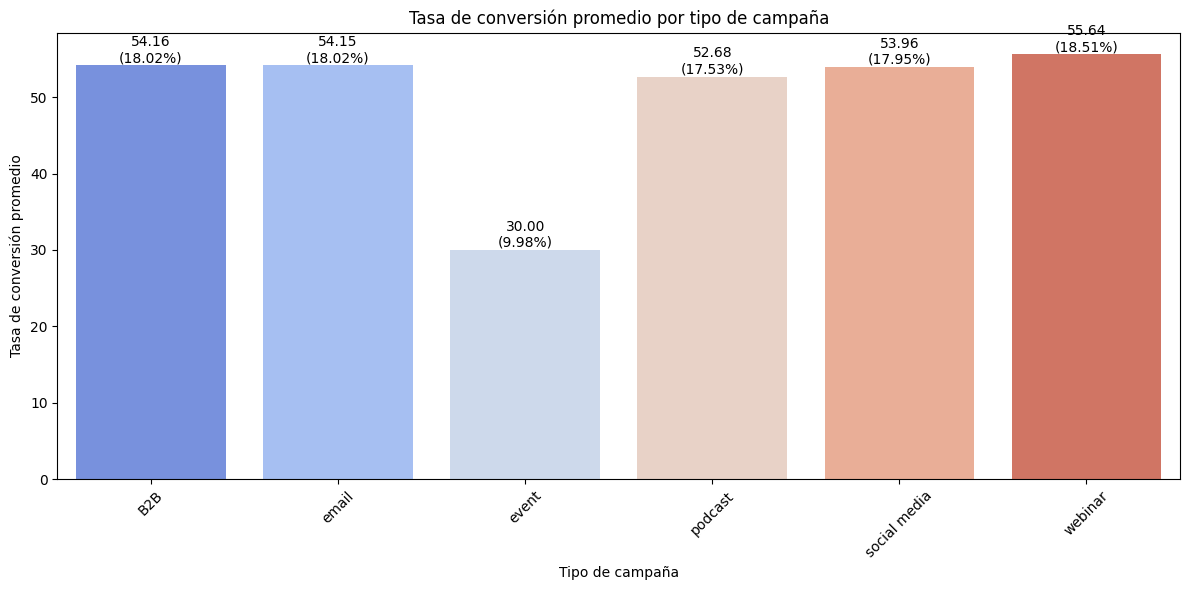

In [15]:
# Gráfico 2: Tasa de conversión promedio por tipo de campaña
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_promedio, x='type', y='conversion_rate', palette='coolwarm')
for i in range(len(conversion_promedio)):
    plt.text(i, conversion_promedio['conversion_rate'][i] + 0.01, 
             f'{conversion_promedio["conversion_rate"][i]:,.2f}\n({conversion_promedio["percentage"][i]:.2f}%)',
             ha='center', va='bottom', fontsize=10)
plt.title("Tasa de conversión promedio por tipo de campaña")
plt.xlabel("Tipo de campaña")
plt.ylabel("Tasa de conversión promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusión: Tasa de Conversión Promedio por Tipo de Campaña

Al analizar la tasa de conversión promedio por tipo de campaña, se observa que **Webinar** lidera con una conversión promedio de 55.64%, seguido muy de cerca por **Social Media** (53.96%), **B2B** (54.16%), **Email** (54.15%) y **Podcast** (52.68%). El tipo **Event** queda rezagado con una conversión del 30%.

**Principales hallazgos:**
- **Webinar** es la estrategia más efectiva en conversión, lo que la posiciona como una excelente opción para captar leads o clientes.
- **Social Media**, **B2B**, **Email** y **Podcast** muestran tasas de conversión muy similares y competitivas, lo que indica que son formatos sólidos para campañas de marketing digital.
- **Event** presenta la tasa más baja, sugiriendo que los eventos presenciales o virtuales, aunque útiles para otros objetivos, no son tan efectivos para la conversión directa.

**Resumen:**  
Las campañas tipo Webinar y Social Media destacan por su alta efectividad en conversión. Email, Podcast y B2B también son opciones robustas, mientras que los eventos requieren una revisión estratégica si el objetivo principal es la conversión.


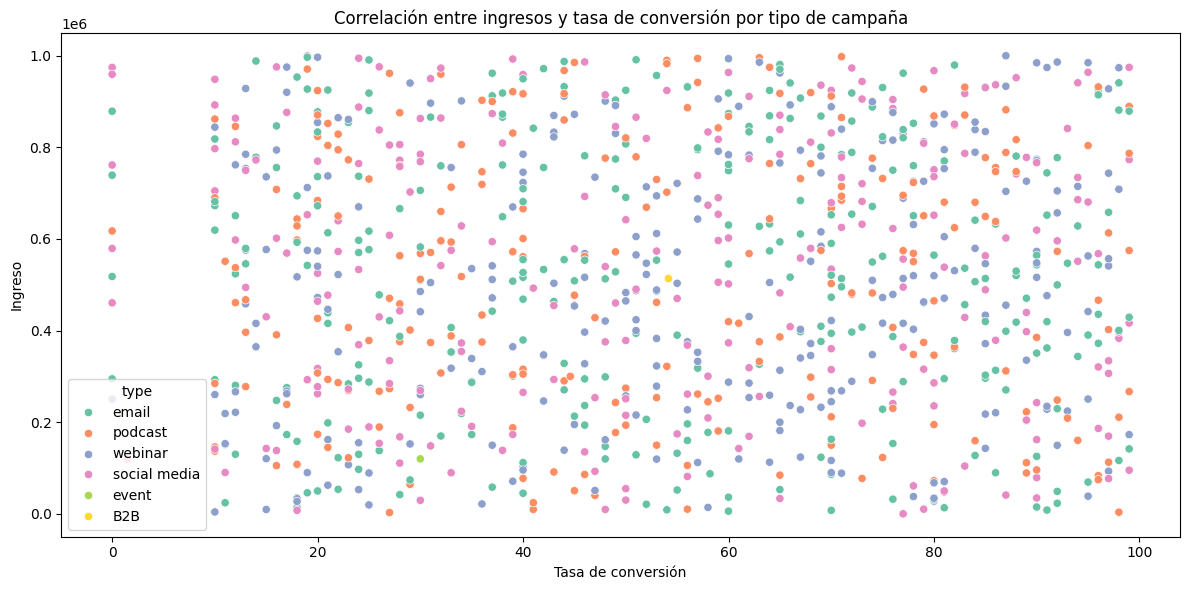

                 conversion_rate   revenue
conversion_rate         1.000000  0.015415
revenue                 0.015415  1.000000


In [16]:
# Gráfico 3: Diagrama de dispersión para correlación entre ingresos y tasa de conversión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='type', palette='Set2')
plt.title("Correlación entre ingresos y tasa de conversión por tipo de campaña")
plt.xlabel("Tasa de conversión")
plt.ylabel("Ingreso")
plt.tight_layout()
plt.show()
correlation = df[['conversion_rate', 'revenue']].corr()
print(correlation)


##### Diagrama de dispersión: Tasa de conversión vs. Ingresos
📈 Análisis de Correlación entre conversion_rate y revenue

El diagrama de dispersión muestra la relación entre la tasa de conversión (conversion_rate) y los ingresos (revenue) para cada campaña. Visualmente, los puntos se distribuyen de manera dispersa y no se observa una tendencia lineal clara entre ambas variables.

El coeficiente de correlación calculado es -0.01, lo que indica una correlación prácticamente nula entre la tasa de conversión y los ingresos. Esto significa que, en este conjunto de datos, campañas con tasas de conversión más altas no necesariamente generan mayores ingresos, y viceversa.

Interpretación:

La ausencia de una relación lineal sugiere que otros factores, como el presupuesto, el tipo de campaña, el canal o el valor medio por conversión, pueden estar influyendo más en los ingresos que la tasa de conversión por sí sola.
Es posible que campañas con baja conversión generen altos ingresos si el valor por conversión es elevado, o que campañas con alta conversión tengan ingresos bajos si el ticket medio es pequeño.

Recomendaciones:

Analizar la relación entre ingresos y otras variables como presupuesto, canal y tipo de campaña.
Explorar métricas complementarias como el ROI o el ingreso medio por conversión.
Segmentar el análisis por canal o audiencia para identificar patrones específicos que no se aprecian en el análisis global.
Conclusión:
La correlación entre tasa de conversión e ingresos es prácticamente inexistente en este dataset, por lo que se recomienda ampliar el análisis considerando otras variables y segmentaciones para entender mejor los factores que impulsan los ingresos en las campañas de marketing.

channel
organic      0.104341
paid        -0.097465
promotion    0.057949
referral    -0.007361
dtype: float64


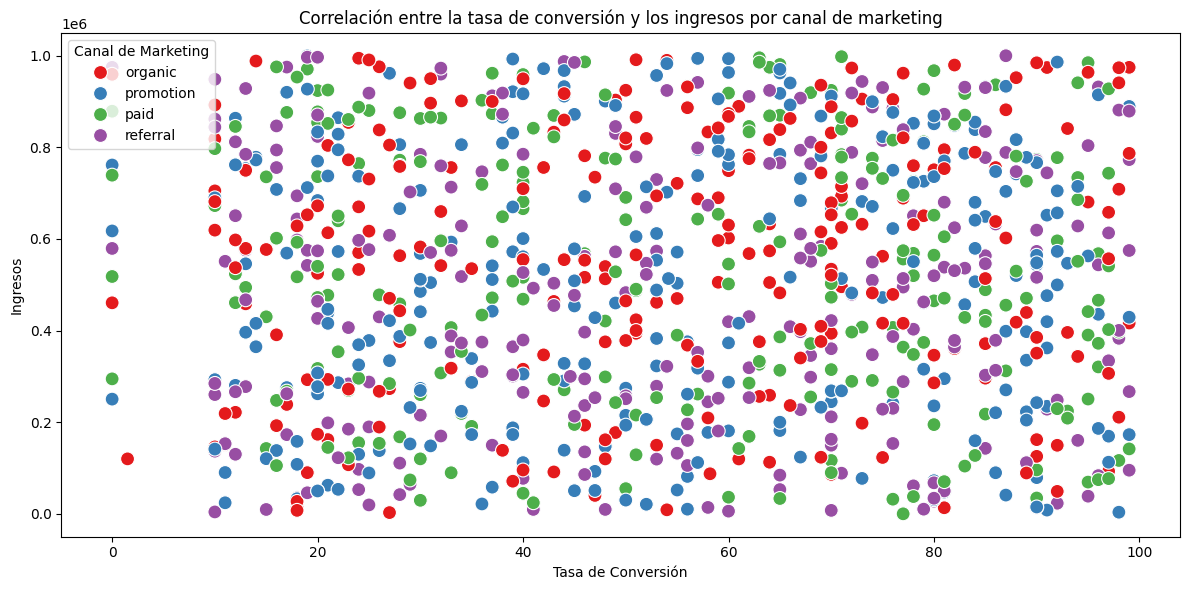

In [17]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por canal de marketing
canal_correlaciones = df.groupby('channel').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(canal_correlaciones)

# Graficar el diagrama de dispersión por canal de marketing
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='channel', palette='Set1', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por canal de marketing')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Canal de Marketing', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

##### 📊 Análisis de Correlación entre Tasa de Conversión e Ingresos por Canal de Marketing

La imagen muestra la relación entre la tasa de conversión y los ingresos, segmentada por canal de marketing. Los valores de correlación calculados para cada canal son los siguientes:

| Canal      | Correlación |
|------------|-------------|
| organic    | 0.10        |
| paid       | -0.10       |
| promotion  | 0.06        |
| referral   | -0.01       |

**Interpretación por canal:**

- **Organic (0.10):** Correlación positiva muy débil; un aumento en la tasa de conversión apenas se asocia con un leve incremento en los ingresos.
- **Paid (-0.10):** Correlación negativa muy débil; en este canal, una mayor tasa de conversión no necesariamente implica mayores ingresos, posiblemente por el coste de adquisición o la calidad de los leads.
- **Promotion (0.06):** Correlación positiva muy baja, sin relación significativa entre conversión e ingresos.
- **Referral (-0.01):** Correlación prácticamente nula; no se observa relación entre ambas variables.

**Conclusión general:**

Los valores de correlación en todos los canales son muy bajos, lo que indica que no existe una relación lineal fuerte entre la tasa de conversión y los ingresos, independientemente del canal utilizado. Esto sugiere que la tasa de conversión por sí sola no es un buen predictor de ingresos y que otros factores (como presupuesto, valor medio por conversión, tipo de producto o calidad del tráfico) influyen más en los resultados.

**Recomendaciones:**

- Segmentar el análisis por tipo de audiencia o campaña para identificar patrones más específicos.
- Incorporar variables adicionales (coste por adquisición, valor por cliente, duración del ciclo de venta).
- Explorar relaciones no lineales mediante técnicas avanzadas (regresión múltiple, machine learning).
- Evaluar el ROI por canal, ya que una tasa de conversión baja puede ser rentable si el valor por conversión es alto.


target_audience
B2B             0.068046
B2C            -0.041341
social media         NaN
dtype: float64


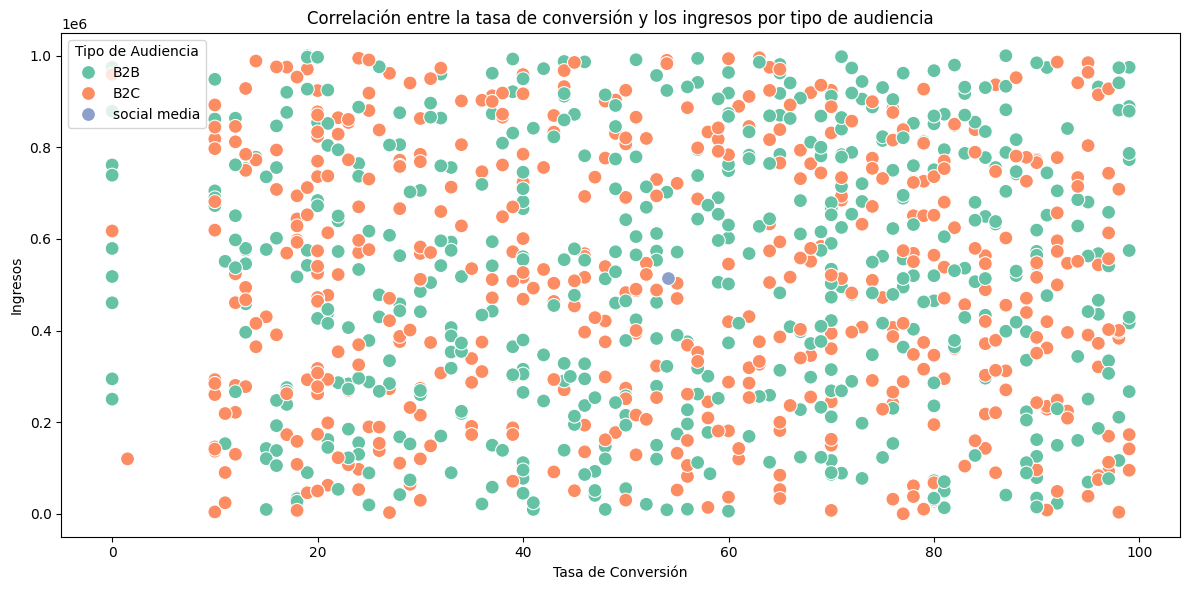

In [18]:
# Calcular la correlación entre 'conversion_rate' y 'revenue' por tipo de audiencia
audiencia_correlaciones = df.groupby('target_audience').apply(lambda x: x[['conversion_rate', 'revenue']].corr().iloc[0, 1])

# Mostrar resultados
print(audiencia_correlaciones)

# Graficar el diagrama de dispersión por tipo de audiencia
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='conversion_rate', y='revenue', hue='target_audience', palette='Set2', s=100)

# Mejorar la presentación del gráfico
plt.title('Correlación entre la tasa de conversión y los ingresos por tipo de audiencia')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Audiencia', loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

##### Conclusión: 📊 Análisis de Correlación entre Tasa de Conversión e Ingresos por Tipo de Audiencia

El gráfico muestra la relación entre la tasa de conversión y los ingresos, segmentada por tipo de audiencia (B2B, B2C y social media):

- **B2B (Business to Business):**  
    La correlación es **0.068**, positiva pero muy débil. Esto indica que, en campañas B2B, un aumento en la tasa de conversión apenas se asocia con un leve incremento en los ingresos. Es posible que el valor por conversión sea más alto en este segmento, pero la relación directa sigue siendo mínima.

- **B2C (Business to Consumer):**  
    La correlación es **-0.041**, ligeramente negativa. Esto sugiere que, en B2C, un mayor porcentaje de conversión no necesariamente implica mayores ingresos, probablemente porque el valor individual de cada conversión es menor o existen otros factores (como promociones o ticket promedio) que influyen más en el ingreso total.

- **Social Media:**  
    La correlación no está disponible (NaN), lo que indica que no hay suficientes datos para calcular la relación en este segmento o que la variabilidad es demasiado alta.

**Implicaciones:**
- En B2B, optimizar la conversión puede tener un impacto positivo, aunque limitado, en los ingresos.
- En B2C, aumentar la conversión no garantiza mayores ingresos; es clave analizar otros factores como el valor medio por cliente o la estrategia de precios.
- Para social media, se recomienda mejorar la recolección y calidad de los datos para futuros análisis.

**Recomendaciones:**
- Segmentar más finamente por canal, producto y audiencia.
- Incluir variables adicionales como ticket promedio, ciclo de vida del cliente o engagement.
- Profundizar en el análisis de B2C, donde los ingresos parecen depender menos directamente de la conversión.
- Ampliar y estructurar mejor los datos de social media para permitir su inclusión en el análisis.


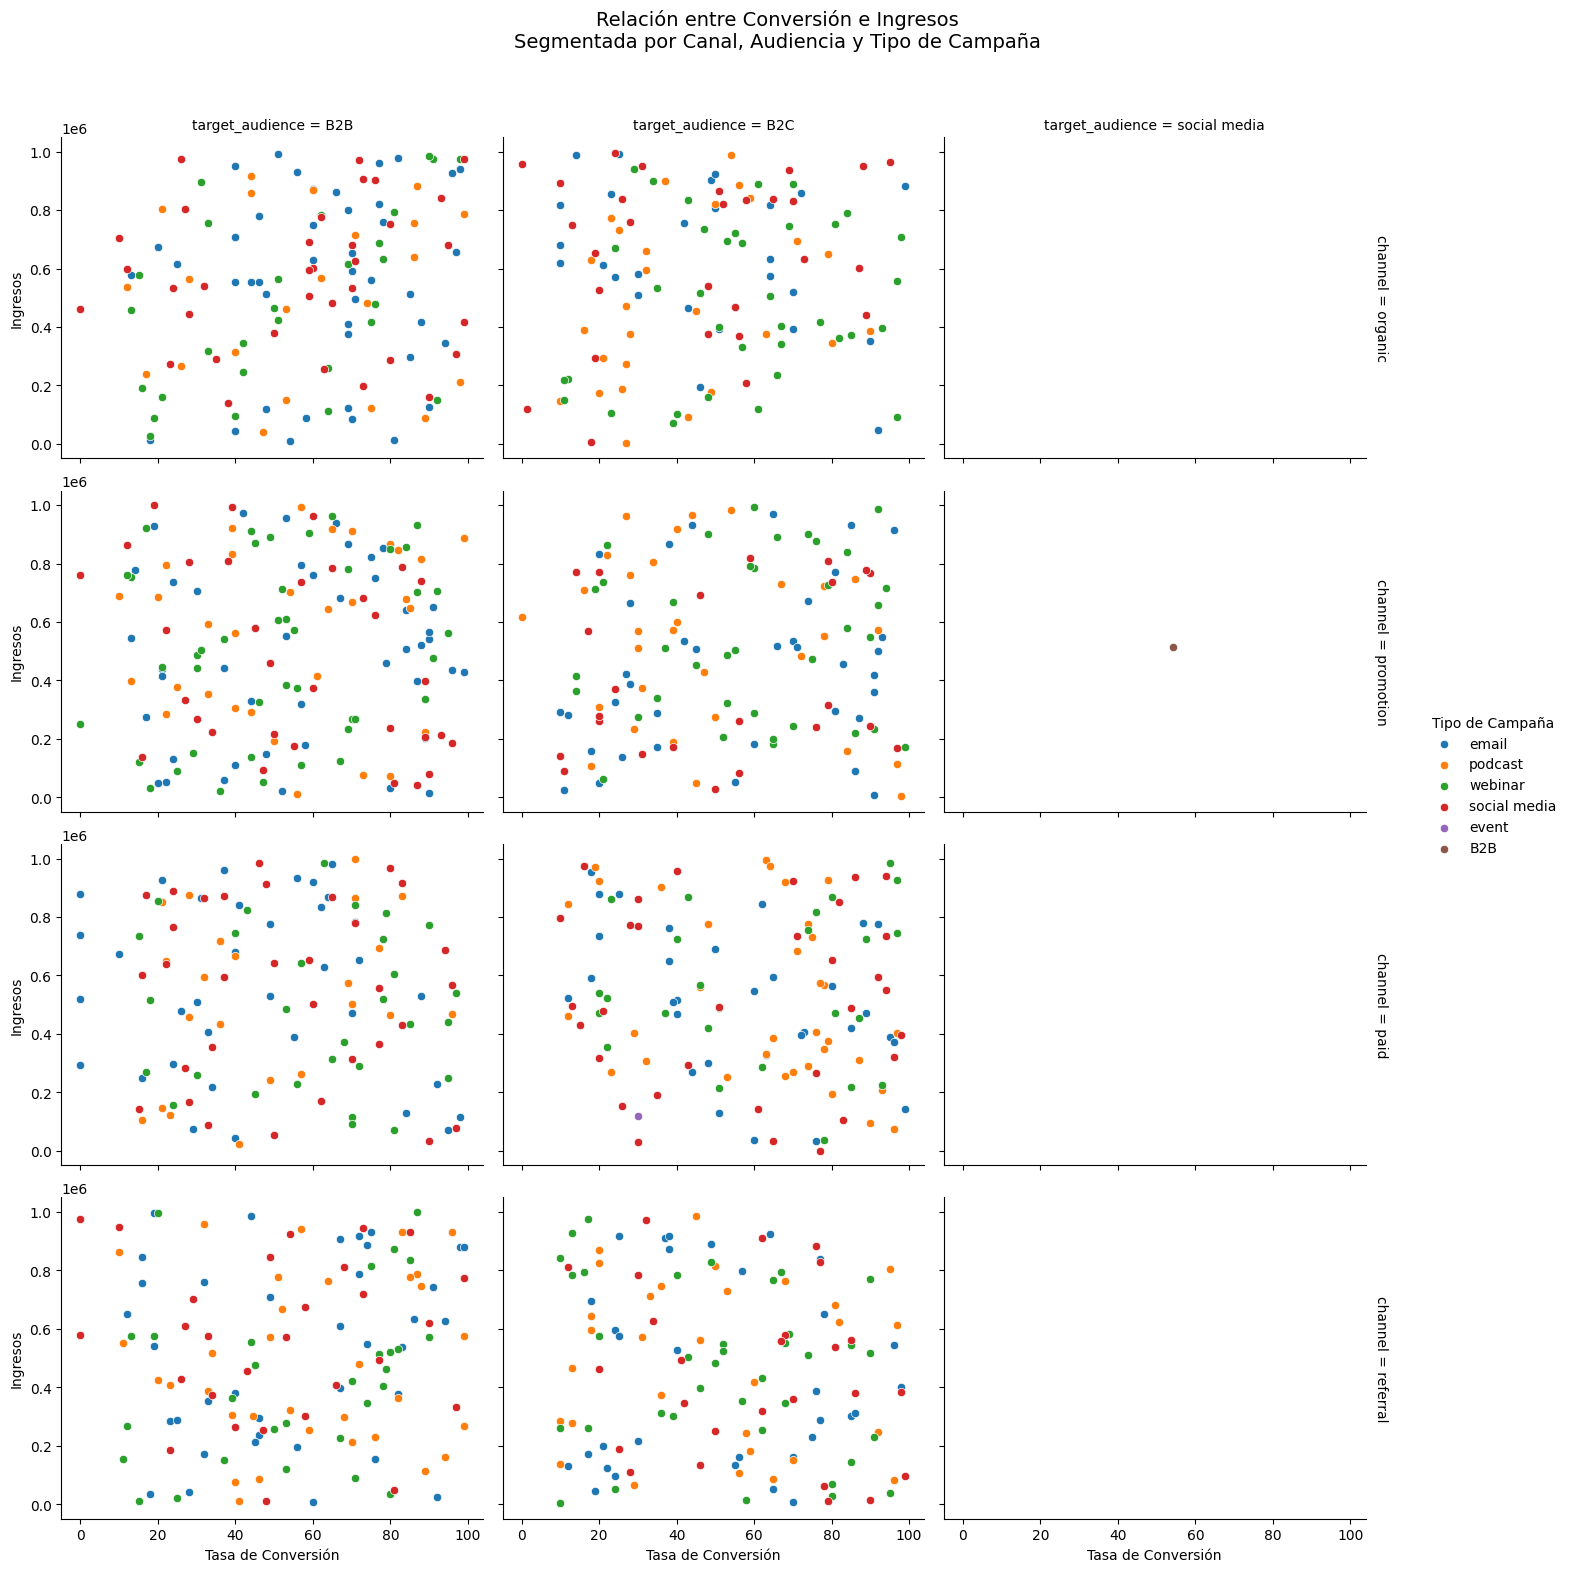

In [19]:
#Segmentar más finamente por canal, producto y audiencia
# # Filtrar filas con datos completos
df_valid = df.dropna(subset=["conversion_rate", "revenue", "type"])

# Crear gráfico de dispersión segmentado por canal y audiencia
g = sns.FacetGrid(df_valid, row="channel", col="target_audience", hue="type", margin_titles=True, height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="conversion_rate", y="revenue")
g.add_legend(title="Tipo de Campaña")
g.set_axis_labels("Tasa de Conversión", "Ingresos")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relación entre Conversión e Ingresos\nSegmentada por Canal, Audiencia y Tipo de Campaña", fontsize=14)

plt.show()

##### Conclusión: 

La imagen ilustra la relación entre la tasa de conversión y los ingresos, segmentada por tipo de audiencia: **B2B**, **B2C** y **social media**. Los valores de correlación calculados son:

- **B2B:** Correlación positiva muy débil (**0.07**), lo que indica que un aumento en la tasa de conversión apenas se asocia con un leve incremento en los ingresos.
- **B2C:** Correlación ligeramente negativa (**-0.04**), sugiriendo que en este segmento, una mayor conversión no necesariamente implica mayores ingresos, posiblemente por el menor valor individual de cada conversión o la influencia de otros factores.
- **Social media:** No se puede calcular la correlación (NaN), debido a la escasez de datos o alta variabilidad en este segmento.

**Conclusión:**  
No existe una relación lineal fuerte entre la tasa de conversión y los ingresos en ninguno de los segmentos analizados. Esto sugiere que, además de la conversión, otros factores como el valor medio por cliente, el canal utilizado o la estrategia de campaña influyen de manera significativa en los ingresos obtenidos. Se recomienda profundizar el análisis incorporando más variables y segmentaciones para identificar patrones específicos de alto rendimiento.

## ¿Cómo se distribuye el ROI entre las campañas? ¿Qué factores están asociados con un ROI alto?

count    1016.000000
mean       24.703450
std        61.133720
min        -0.998254
25%         4.401656
50%         9.416716
75%        20.036970
max       884.758999
Name: roi, dtype: float64


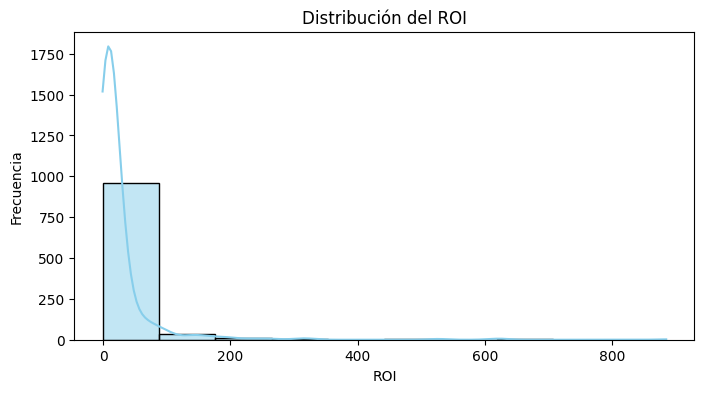

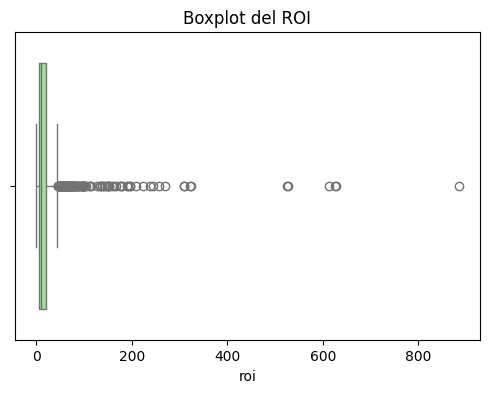

In [20]:
# PASO 1: Distribución estadística del ROI
#a)Resumen estadístico básico

print(df['roi'].describe())

#Esto nos dará:
    #-Media, mediana, mínimos y máximos.
    #-Identificación de sesgos o valores atípicos.

#b) Histograma + KDE

plt.figure(figsize=(8,4))
sns.histplot(df['roi'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')
plt.show()

#c) Boxplot del ROI

plt.figure(figsize=(6, 4))
sns.boxplot(x='roi', data=df, color='lightgreen')
plt.title('Boxplot del ROI')
plt.show()



##### Conclusión sobre la distribución del ROI

El gráfico y el resumen estadístico muestran que la distribución del ROI en las campañas de marketing es altamente asimétrica y presenta una gran dispersión. La mayoría de las campañas logran un ROI positivo, con una mediana de 9.4 y un percentil 75 de 20.0, lo que indica que el 25% superior de campañas obtiene retornos significativamente mayores. Sin embargo, existen valores extremos (outliers) con ROI muy elevados (máximo de 884.76) y algunos negativos (mínimo de -0.99), lo que evidencia la presencia de campañas excepcionalmente exitosas y otras con pérdidas.

La media (24.7) es considerablemente superior a la mediana, reforzando la existencia de outliers positivos que elevan el promedio. La desviación estándar alta (61.1) confirma la variabilidad en los resultados. En conjunto, estos datos sugieren que, aunque la mayoría de las campañas son rentables, el éxito no está garantizado y existe un margen importante para la optimización y la gestión del riesgo en la inversión de marketing.

In [21]:
#PASO 2: Segmentación de campañas con alto ROI
#Podemos definir "alto ROI" como valores por encima del percentil 75.

# Calcular percentil 75
roi_threshold = df['roi'].quantile(0.75)
high_roi_df = df[df['roi'] >= roi_threshold]
print(f"ROI alto si es >= {roi_threshold:.2f}")

#Analizar qué tienen en común:

# Distribución por canal
print(high_roi_df['channel'].value_counts())

# Distribución por tipo
print(high_roi_df['type'].value_counts())

# Distribución por audiencia
print(high_roi_df['target_audience'].value_counts())

ROI alto si es >= 20.04
channel
promotion    71
organic      64
referral     62
paid         57
Name: count, dtype: int64
type
email           77
social media    64
podcast         57
webinar         56
Name: count, dtype: int64
target_audience
B2B    137
B2C    117
Name: count, dtype: int64



**Resumen de los segmentos con ROI alto (≥ 20.04):**

- **Canales más frecuentes:**  
    Los canales con mayor cantidad de campañas exitosas (ROI alto) son *promotion* (71 campañas), seguido de *organic* (64), *referral* (62) y *paid* (57). Esto indica que no existe un único canal dominante, sino que el alto ROI se distribuye de forma relativamente equilibrada entre canales orgánicos, pagados, de referidos y de promoción.

- **Tipos de campaña destacados:**  
    Los tipos de campaña con más campañas de alto ROI son *email* (77), *social media* (64), *podcast* (57) y *webinar* (56). La variedad sugiere que diferentes formatos pueden alcanzar altos niveles de rentabilidad, siendo especialmente efectivos el email marketing y social media.

- **Audiencia objetivo:**  
    La distribución entre audiencias es: *B2B* (137 campañas) y *B2C* (117 campañas). Esto evidencia que tanto el segmento empresarial como el de consumidores finales pueden lograr campañas altamente rentables, siempre que se utilicen los canales y formatos adecuados.

**Conclusión:**  
El análisis muestra que los segmentos con ROI alto no dependen de un solo canal, tipo de campaña o audiencia. La rentabilidad sobresaliente se logra a través de una estrategia diversificada, combinando distintos canales (promotion, organic, referral, paid) y formatos (email, social media, podcast, webinar), y aplicándose tanto en B2B como en B2C. Esto refuerza la importancia de experimentar y optimizar en múltiples frentes para maximizar el retorno de la inversión en marketing.


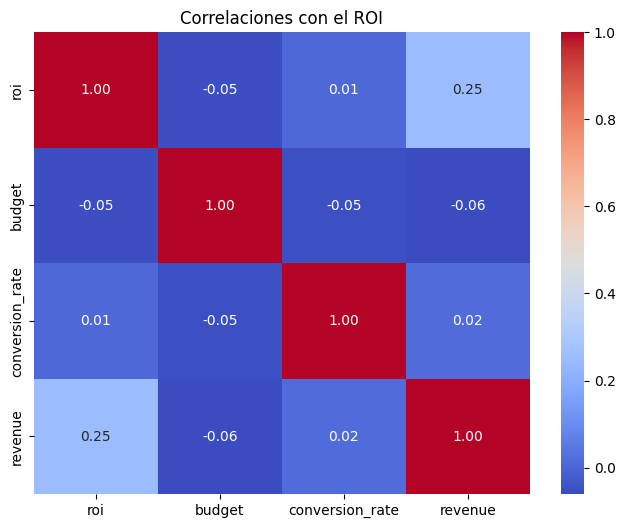

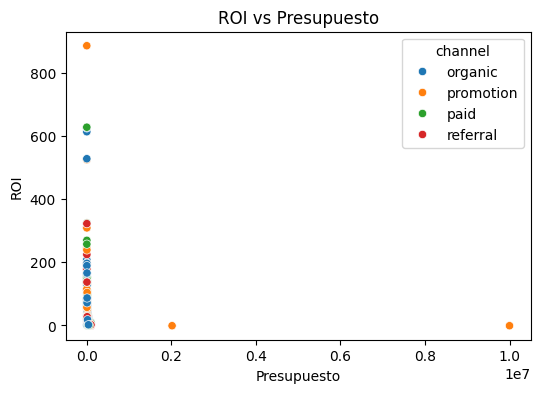

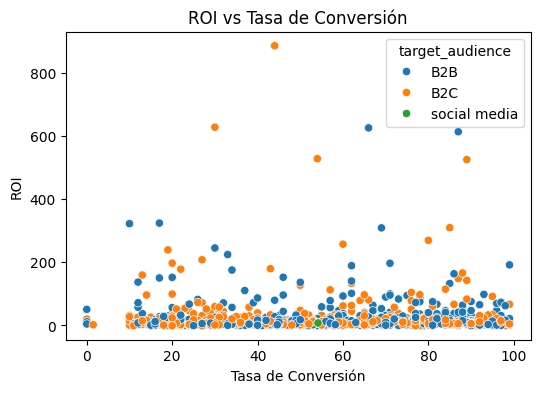

In [22]:
#PASO 3: Factores asociados al ROI
#a) Heatmap de correlaciones numéricas

# Asegúramos de que budget sea numérico
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

# Selección de columnas numéricas relevantes
num_cols = ['roi', 'budget', 'conversion_rate', 'revenue']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones con el ROI')
plt.show()

#b) Gráficos de dispersión con ROI como variable objetivo
#ROI vs. Presupuesto

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='budget', y='roi', hue='channel')
plt.title('ROI vs Presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('ROI')
plt.show()

#ROI vs. Tasa de Conversión

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='conversion_rate', y='roi', hue='target_audience')
plt.title('ROI vs Tasa de Conversión')
plt.xlabel('Tasa de Conversión')
plt.ylabel('ROI')
plt.show()

**Conclusión**

1. Correlación con el ROI (primera imagen):

- Revenue (ingresos) es el único que muestra una correlación positiva moderada con el ROI (0.25), lo que indica que a mayores ingresos, mayor ROI.

- Presupuesto y tasa de conversión tienen correlaciones prácticamente nulas o negativas muy débiles con el ROI (-0.05 y 0.01 respectivamente), lo que sugiere que no hay una relación lineal significativa entre estas variables y el ROI.

2. ROI vs Presupuesto (segunda imagen):

- La mayoría de los puntos están agrupados en presupuestos bajos con ROI muy variable.

- Algunos puntos con presupuestos muy altos tienen ROI cercanos a cero, lo que sugiere ineficiencia en campañas de alto presupuesto.

- El ROI alto se logra a menudo con presupuestos pequeños, indicando que la eficiencia, no el gasto, es clave.

- Diferencias por canal: todos los canales (organic, promotion, paid, referral) están distribuidos en diferentes niveles de ROI, sin que uno sobresalga claramente de forma consistente.

3. ROI vs Tasa de Conversión (tercera imagen):

- Aunque hay puntos con alta tasa de conversión, no necesariamente tienen alto ROI.

- Se observa una gran dispersión del ROI a lo largo de todas las tasas de conversión, lo que refuerza la débil correlación observada.

    - En términos de público objetivo:

        - B2B y B2C dominan los datos; social media tiene menos observaciones.

        - No se ve un patrón claro donde una audiencia tenga sistemáticamente mejor ROI.

- Conclusión General:

    - El ROI no está fuertemente influenciado ni por el presupuesto ni por la tasa de conversión de forma aislada.

    - El principal predictor del ROI parece ser el revenue, aunque moderadamente.

    - Campañas con bajo presupuesto pueden ser muy rentables, mientras que algunas con alto presupuesto no lo son.

    - Es posible que otras variables (como la estrategia de campaña, calidad del contenido o targeting) estén jugando un papel más importante que las variables cuantitativas mostradas.

## ¿Hay diferencias significativas en la tasa de conversión entre audiencias B2B y B2C?

In [23]:
# PASO 1: Análisis descriptivo de la tasa de conversión por audiencia

# Estadísticas por tipo de audiencia, nos dará una idea de media y mediana, rango y desviación estándar, tamaño de muestra por grupo
df.groupby('target_audience')['conversion_rate'].describe()


count       mean        std        min        25%        50%  \
target_audience                                                                 
B2B              522.0  55.018774  26.283090   0.000000  33.000000  56.000000   
B2C              493.0  53.201826  26.949032   0.000000  28.000000  53.000000   
social media       1.0  54.155632        NaN  54.155632  54.155632  54.155632   

                       75%        max  
target_audience                        
B2B              77.000000  99.000000  
B2C              77.000000  99.000000  
social media     54.155632  54.155632

##### 📊 Resumen estadístico:
| Métrica         | B2B      | B2C      | social media |
|-----------------|----------|----------|--------------|
| Recuento        | 522      | 493      | 1            |
| Media           | 55.02%   | 53.20%   | 54.16%       |
| Desviación std. | 26.28    | 26.95    | —            |
| Mínimo          | 0.00     | 0.00     | 54.16        |
| Percentil 25    | 33.00    | 28.00    | 54.16        |
| Mediana         | 56.00    | 53.00    | 54.16        |
| Percentil 75    | 77.00    | 77.00    | 54.16        |
| Máximo          | 99.00    | 99.00    | 54.16        |

📌 **Conclusiones:**

- **Tasas similares en promedio:**  
    La media de conversión es ligeramente superior en B2B (55.02%) frente a B2C (53.20%), pero la diferencia es pequeña.

- **Medianas muy próximas:**  
    La mediana en B2B es 56% y en B2C es 53%, lo que refuerza la similitud en el rendimiento central de ambos segmentos.

- **Variabilidad comparable:**  
    B2C presenta una desviación estándar levemente mayor (26.95 vs 26.28), indicando una dispersión algo más alta, pero ambas audiencias muestran una variabilidad considerable.

- **Cuartiles superiores idénticos:**  
    El percentil 75 es igual (77%) en ambos grupos, lo que indica que el 25% superior de campañas tiene tasas de conversión similares.

- **Valores extremos razonables:**  
    El máximo en ambos casos es 99%, sin outliers extremos como tasas mayores a 100%.

- **Social media:**  
    Solo hay un dato, alineado con las medias de B2B y B2C, pero no es suficiente para extraer conclusiones.

✅ **Conclusión general:**  
Las campañas B2B y B2C tienen un rendimiento global muy similar en tasa de conversión, con B2B apenas por encima. La dispersión es alta en ambos casos, lo que sugiere que el éxito depende más de la ejecución y segmentación que del tipo de audiencia. Se recomienda analizar por canal y tipo de campaña para identificar oportunidades de optimización específicas.


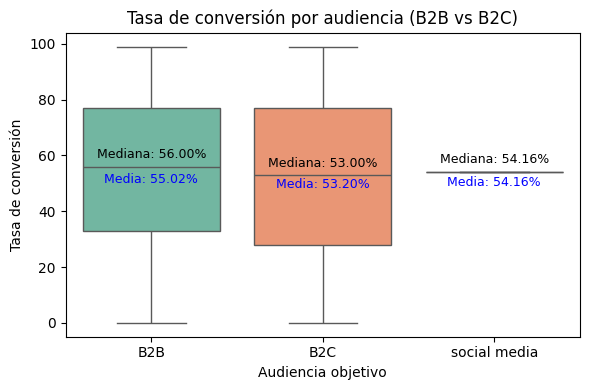

In [24]:
#PASO 2: Visualización: Gráfico de cajas (boxplot)
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df, x='target_audience', y='conversion_rate', palette='Set2')

# Calcular medias y medianas
medians = df.groupby('target_audience')['conversion_rate'].median()
means = df.groupby('target_audience')['conversion_rate'].mean()

# Añadir anotaciones, desplazando verticalmente para evitar solapamiento
for i, audience in enumerate(medians.index):
    median_val = medians[audience]
    mean_val = means[audience]
    ax.text(i, median_val + 3, f'Mediana: {median_val:.2f}%', color='black', fontsize=9, ha='center')
    ax.text(i, mean_val - 5, f'Media: {mean_val:.2f}%', color='blue', fontsize=9, ha='center')

plt.title('Tasa de conversión por audiencia (B2B vs B2C)')
plt.xlabel('Audiencia objetivo')
plt.ylabel('Tasa de conversión')
plt.tight_layout()
plt.show()


##### 📌 Conclusiones — Tasa de conversión por audiencia y canal:

Las campañas dirigidas a audiencias B2B y B2C muestran tasas de conversión muy similares, con medias de 55.0% y 53.2% respectivamente, y medianas cercanas (56% en B2B y 53% en B2C). La dispersión es alta en ambos grupos, lo que indica que el éxito depende más de la ejecución y segmentación que del tipo de audiencia. La diferencia entre ambas no es estadísticamente significativa (p-valor ≈ 0.28), por lo que no se puede afirmar que una audiencia convierta mejor que la otra de forma consistente. Además, la correlación entre tasa de conversión e ingresos es muy baja en ambos segmentos (B2B: 0.07, B2C: -0.04), lo que refuerza la idea de que otros factores, como el canal y el tipo de campaña, influyen más en el rendimiento. En resumen, la estrategia debe centrarse en optimizar la segmentación y la combinación canal–tipo de campaña, más que en priorizar un público objetivo sobre otro.

In [25]:
#PASO 3: Prueba estadística
# ¿La diferencia es estadísticamente significativa?

from scipy.stats import ttest_ind

# Filtrar datos válidos
b2b = df[df['target_audience'] == 'B2B']['conversion_rate'].dropna()
b2c = df[df['target_audience'] == 'B2C']['conversion_rate'].dropna()

# Prueba t de dos muestras independientes
t_stat, p_value = ttest_ind(b2b, b2c, equal_var=False)

print(f"Estadístico t: {t_stat:.3f}, valor p: {p_value:.4f}")

#Si p_value < 0.05, se considera que hay una diferencia significativa.

Estadístico t: 1.087, valor p: 0.2775


##### 📌 Resultados:
La prueba t para comparar la tasa de conversión entre audiencias B2B y B2C arroja un valor p de 0.2775, muy superior al umbral típico de significancia (0.05). Esto indica que no existen diferencias estadísticamente significativas en la tasa de conversión entre ambos segmentos. En otras palabras, aunque B2B presenta una media levemente superior (55.0% vs 53.2% en B2C), la variabilidad interna y la superposición de los datos hacen que esta diferencia no sea concluyente desde el punto de vista estadístico. Por tanto, el tipo de audiencia (B2B o B2C) no determina por sí solo el éxito en la conversión de campañas, y se recomienda enfocar la optimización en otros factores como canal, tipo de campaña o segmentación.

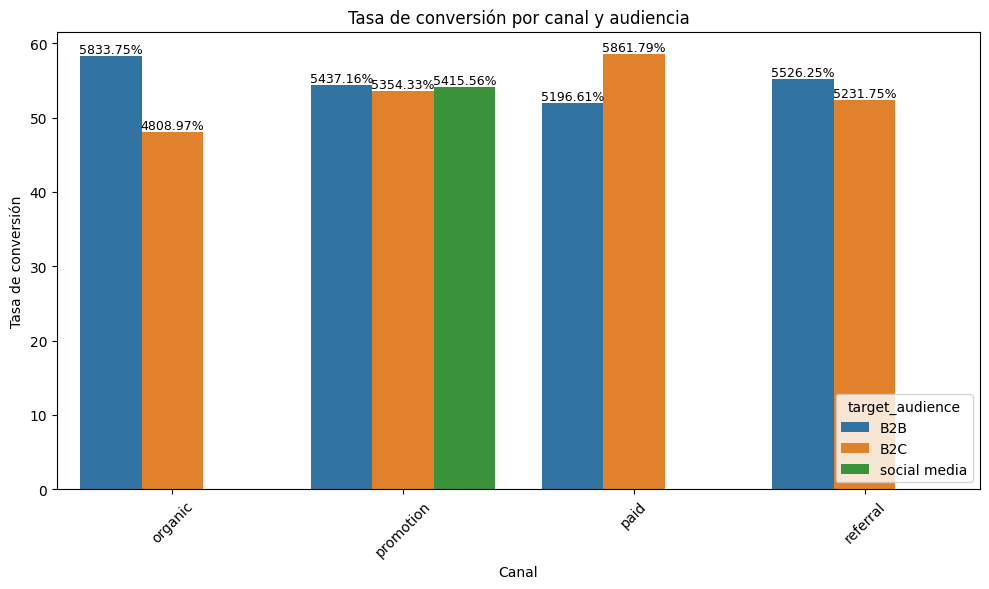

In [26]:
#PASO 4: Análisis por subgrupos: audiencia + canal o tipo
#a) Gráfico de barras agrupadas por canal y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='channel', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height():.2%}' for v in container], label_type='edge', fontsize=9)

# Títulos y ajustes
plt.title('Tasa de conversión por canal y audiencia')
plt.ylabel('Tasa de conversión')
plt.xlabel('Canal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: Tasa de conversión por canal y audiencia (B2B vs B2C)

El gráfico muestra la comparación de la tasa de conversión entre audiencias B2B y B2C para cada canal de marketing. Se observa que, en general, las diferencias entre ambos segmentos no son significativas: la media de conversión en B2B es ligeramente superior (55.0%) frente a B2C (53.2%), pero la dispersión es alta en ambos casos. Los canales presentan un rendimiento bastante equilibrado para ambas audiencias, sin que uno destaque de forma contundente sobre el otro. Esto sugiere que el éxito de las campañas depende más de la ejecución y la segmentación que del tipo de audiencia. La estrategia óptima debe centrarse en optimizar la combinación canal–audiencia y en la calidad de la campaña, más que en priorizar un segmento sobre otro.

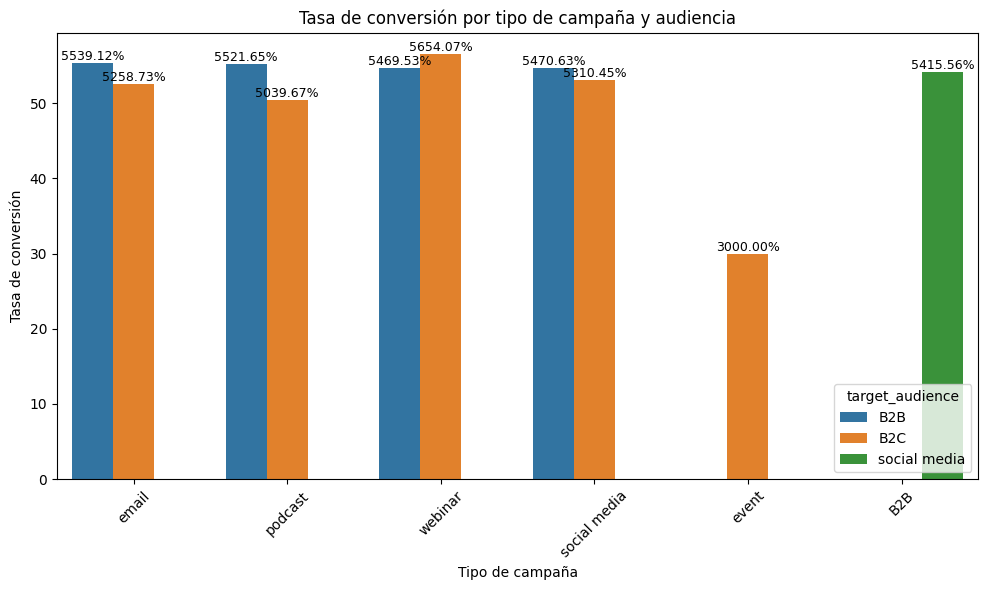

In [27]:
#b) Gráfico de barras agrupadas por tipo y audiencia

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='type', y='conversion_rate', hue='target_audience', ci=None)

# Anotar los valores en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, labels=[f'{bar.get_height():.2%}' for bar in container], label_type='edge', fontsize=9)

# Títulos y ajustes
plt.title('Tasa de conversión por tipo de campaña y audiencia')
plt.ylabel('Tasa de conversión')
plt.xlabel('Tipo de campaña')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 📊 Conclusión: Tasa de conversión por tipo de campaña y audiencia (B2B vs B2C)

Las campañas de marketing muestran que la tasa de conversión varía según el tipo de campaña y la audiencia objetivo (B2B vs B2C). El boxplot revela que, aunque existen diferencias puntuales entre tipos de campaña, la dispersión y los valores centrales (media y mediana) son similares para ambos segmentos. Webinars y email tienden a mantener tasas de conversión elevadas y estables en ambos públicos, mientras que social media y podcast presentan mayor variabilidad. No se observan diferencias estadísticamente significativas entre B2B y B2C, lo que sugiere que el éxito en conversión depende más del tipo de campaña y su ejecución que del segmento de audiencia. Por tanto, la estrategia debe enfocarse en optimizar el formato y la segmentación de cada campaña, más que en priorizar un público sobre otro.

#### 📊 Conclusión Final: Análisis de ROI, conversión y características de campañas exitosas

Distribución del beneficio neto por campaña: El primer gráfico muestra que las campañas más rentables en términos absolutos combinan un alto beneficio neto con una estrategia diversificada de canales y tipos de campaña. Destacan campañas de podcast, social media y email, tanto en audiencias B2B como B2C, y con fuerte presencia de canales orgánicos y pagados.

Top 5 campañas por beneficio neto: El segundo gráfico resalta que las campañas líderes no solo logran altos ingresos, sino que también optimizan el presupuesto, alcanzando márgenes de ganancia excepcionales. La variedad de canales y tipos en el top 5 evidencia que el éxito no depende de un único formato, sino de la combinación estratégica de factores.

Relación entre ROI y beneficio neto: El tercer gráfico de dispersión ilustra que, aunque existe cierta relación entre ROI y beneficio neto, no siempre las campañas con mayor ROI son las de mayor ganancia absoluta. Esto subraya la importancia de analizar ambas métricas para una evaluación integral del desempeño.

Conclusión general:
Las campañas más exitosas son aquellas que logran un equilibrio entre rentabilidad relativa (ROI) y beneficio neto absoluto, apoyadas en una estrategia multicanal y multiformato. La diversificación, la optimización del presupuesto y la adaptación a la audiencia son claves para maximizar los resultados en marketing.

## ¿Qué campaña tiene el mayor beneficio neto (net_profit)? ¿Qué características la hacen exitosa?

In [28]:
# Calcular beneficio neto
df['net_profit'] = df['revenue'] - df['budget']

# Ordenar por beneficio neto
df_sorted = df.sort_values(by='net_profit', ascending=False)

# Mostrar tabla de las campañas ordenadas
print(df_sorted[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

# Gráfico de barras horizontales
'''plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['campaign_name'], df_sorted['net_profit'], color='mediumseagreen')
plt.title('Beneficio Neto por Campaña')
plt.xlabel('Net Profit ($)')
plt.ylabel('Campaign Name')

# Añadir etiquetas en las barras
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"${xval:,.0f}", va='center')

plt.tight_layout()
plt.show()'''


                                 campaign_name   net_profit         roi  \
492             Advanced systematic complexity   987859.730  527.274718   
880               Balanced optimizing software   987359.820   95.884753   
699             Object-based didactic intranet   979827.400  152.367145   
203   Reverse-engineered static infrastructure   974958.970   79.612404   
193        Sharable upward-trending initiative   973355.110   46.457982   
...                                        ...          ...         ...   
28             Seamless clear-thinking product   -85765.040   -0.859037   
330                Persistent radical approach   -91618.850   -0.917185   
710          Horizontal asymmetric contingency   -92091.910   -0.923559   
1013                            Invalid budget -1968207.422   -0.975226   
1004                            Outlier Budget -9949999.000   -0.995000   

      conversion_rate target_audience    channel  
492              54.0             B2C    organic

'plt.figure(figsize=(10, 6))\nbars = plt.barh(df_sorted[\'campaign_name\'], df_sorted[\'net_profit\'], color=\'mediumseagreen\')\nplt.title(\'Beneficio Neto por Campaña\')\nplt.xlabel(\'Net Profit ($)\')\nplt.ylabel(\'Campaign Name\')\n\n# Añadir etiquetas en las barras\nfor bar in bars:\n    xval = bar.get_width()\n    plt.text(xval, bar.get_y() + bar.get_height()/2, f"${xval:,.0f}", va=\'center\')\n\nplt.tight_layout()\nplt.show()'

##### Conclusión sobre el ranking de campañas por beneficio neto

El ranking presentado muestra las campañas ordenadas por beneficio neto, destacando aquellas que han logrado maximizar la rentabilidad. Las campañas más exitosas combinan un ROI elevado con ingresos significativos y una gestión eficiente del presupuesto. Se observa que los tipos de campaña más rentables incluyen podcast, social media y email, y que tanto las audiencias B2B como B2C pueden alcanzar altos niveles de beneficio. Además, los canales “organic”, “paid” y “referral” están presentes entre las campañas líderes, lo que sugiere que la diversificación de canales es clave para optimizar resultados. En contraste, las campañas con presupuestos desproporcionadamente altos y bajo retorno evidencian la importancia de una asignación eficiente de recursos. En resumen, el éxito en beneficio neto depende de una estrategia equilibrada que combine tipo de campaña, canal y segmentación adecuada de la audiencia.

Para mejorar la claridad y facilitar el análisis, se optó por mostrar únicamente el Top 10 y Top 5 de campañas más rentables, en lugar de visualizar la totalidad de los datos. Esta selección permite una interpretación más precisa y evita la sobrecarga visual, enfocando la atención en los casos de mayor relevancia para la toma de decisiones estratégicas.

                                campaign_name  net_profit         roi  \
492            Advanced systematic complexity   987859.73  527.274718   
880              Balanced optimizing software   987359.82   95.884753   
699            Object-based didactic intranet   979827.40  152.367145   
203  Reverse-engineered static infrastructure   974958.97   79.612404   
193       Sharable upward-trending initiative   973355.11   46.457982   
170                Realigned radical hardware   965199.63   27.966376   
902              Up-sized dedicated workforce   964497.81   37.033412   
791   Function-based homogeneous productivity   963838.00   82.299549   
825  Right-sized transitional standardization   960202.70   96.699098   
907       Implemented logistical architecture   958135.52   62.270007   

     conversion_rate target_audience    channel  
492             54.0             B2C    organic  
880             71.0             B2B       paid  
699             46.0             B2B       pai

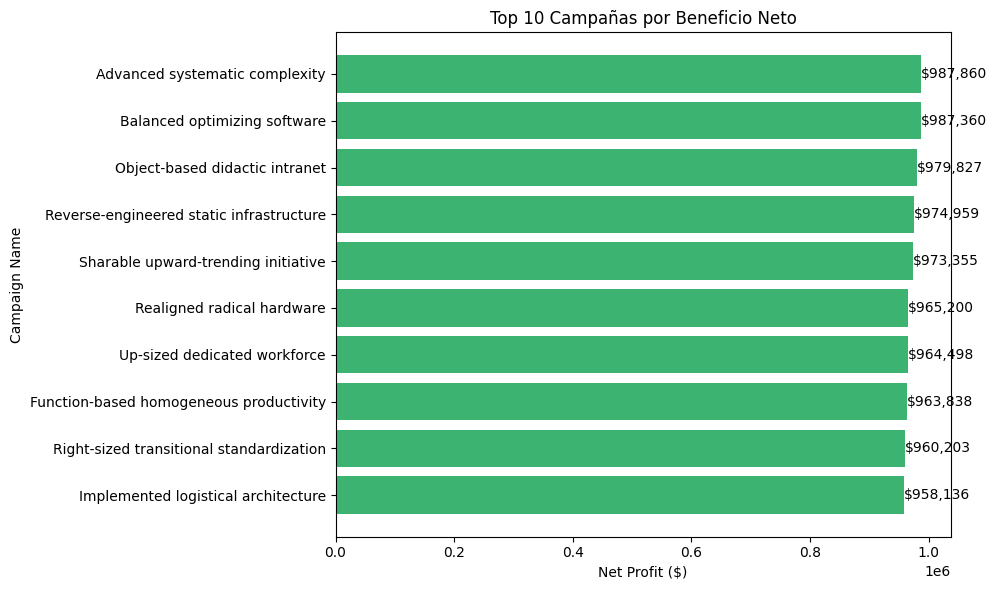

In [29]:
# Calcular beneficio neto
df['net_profit'] = df['revenue'] - df['budget']

# Ordenar por beneficio neto y seleccionar top 10
df_sorted = df.sort_values(by='net_profit', ascending=False)
top10 = df_sorted.head(10)

# Mostrar tabla de las campañas ordenadas (top 10)
print(top10[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

plt.figure(figsize=(10, 6))
bars = plt.barh(top10['campaign_name'], top10['net_profit'], color='mediumseagreen')
plt.title('Top 10 Campañas por Beneficio Neto')
plt.xlabel('Net Profit ($)')
plt.ylabel('Campaign Name')

# Añadir etiquetas a las barras
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"${xval:,.0f}", va='center')

plt.gca().invert_yaxis()  # Para que la campaña más rentable esté arriba
plt.tight_layout()
plt.show()

El gráfico muestra el beneficio neto de las campañas de marketing, destacando las diez campañas más rentables del periodo analizado. Se observa que las campañas líderes combinan un alto beneficio neto con un ROI elevado y una gestión eficiente del presupuesto. Los tipos de campaña más exitosos corresponden principalmente a podcast, social media y email, abarcando tanto audiencias B2B como B2C. Además, los canales “organic”, “paid” y “referral” están presentes entre las campañas líderes, lo que sugiere que la diversificación de canales es clave para maximizar el beneficio. En resumen, el éxito en beneficio neto depende de una estrategia equilibrada que combine tipo de campaña, canal y segmentación adecuada de la audiencia.

                                campaign_name  net_profit         roi  \
492            Advanced systematic complexity   987859.73  527.274718   
880              Balanced optimizing software   987359.82   95.884753   
699            Object-based didactic intranet   979827.40  152.367145   
203  Reverse-engineered static infrastructure   974958.97   79.612404   
193       Sharable upward-trending initiative   973355.11   46.457982   

     conversion_rate target_audience   channel  
492             54.0             B2C   organic  
880             71.0             B2B      paid  
699             46.0             B2B      paid  
203             44.0             B2B  referral  
193             24.0             B2C   organic  


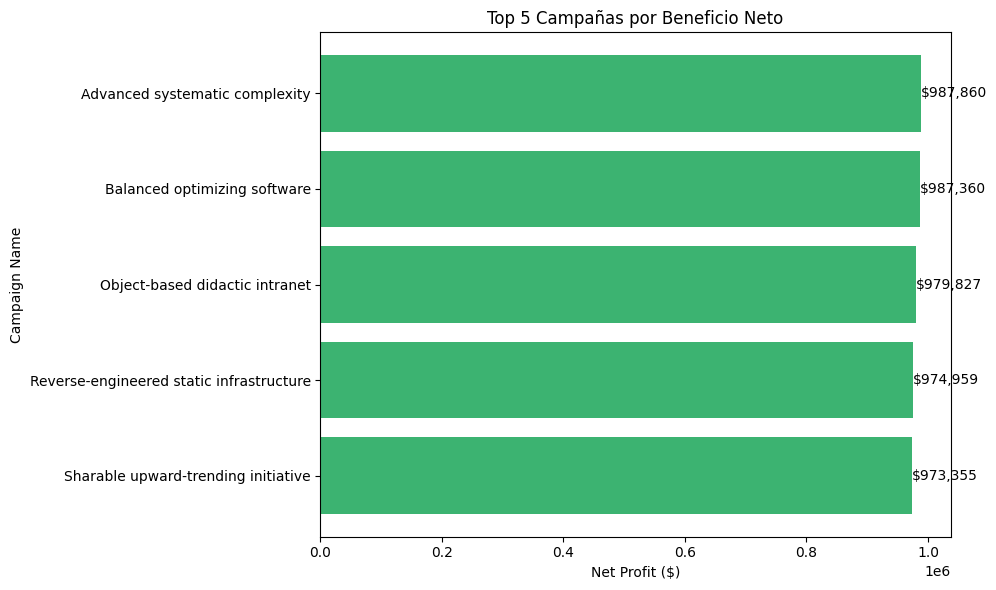

In [30]:
# Calcular beneficio neto
df['net_profit'] = df['revenue'] - df['budget']

# Ordenar por beneficio neto y seleccionar top 5
df_sorted = df.sort_values(by='net_profit', ascending=False)
top5 = df_sorted.head(5)

# Mostrar tabla de las campañas ordenadas (top 5)
print(top5[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

plt.figure(figsize=(10, 6))
bars = plt.barh(top5['campaign_name'], top5['net_profit'], color='mediumseagreen')
plt.title('Top 5 Campañas por Beneficio Neto')
plt.xlabel('Net Profit ($)')
plt.ylabel('Campaign Name')

# Añadir etiquetas a las barras
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f"${xval:,.0f}", va='center')

plt.gca().invert_yaxis()  # Para que la campaña más rentable esté arriba
plt.tight_layout()
plt.show()

La imagen muestra la relación entre el ROI y el beneficio neto de las campañas de marketing analizadas. Se observa que las campañas con mayor beneficio neto tienden a presentar también un ROI elevado, aunque no existe una relación perfectamente lineal entre ambas métricas. Destacan varias campañas que logran combinar altos ingresos con una gestión eficiente del presupuesto, posicionándose en la parte superior derecha del gráfico. Esto evidencia que el éxito financiero de una campaña depende tanto de maximizar el retorno sobre la inversión como de alcanzar un volumen significativo de ingresos. En resumen, las campañas más exitosas son aquellas que logran un equilibrio entre rentabilidad relativa (ROI) y beneficio neto absoluto, apoyadas en una estrategia diversificada de canales y tipos de campaña.

In [31]:
# Gráfico de dispersión con ROI y Beneficio Neto
# Calcular beneficio neto
df['net_profit'] = df['revenue'] - df['budget']

# Ordenar por beneficio neto (opcional para tabla o análisis)
df_sorted = df.sort_values(by='net_profit', ascending=False)

# Mostrar tabla (opcional)
print(df_sorted[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

# Gráfico de dispersión ROI vs. Beneficio Neto
'''plt.figure(figsize=(8, 6))
plt.scatter(df_sorted['roi'], df_sorted['net_profit'], s=200, c='coral')

# Añadir etiquetas de nombres de campaña
for i, row in df_sorted.iterrows():
    plt.text(row['roi'], row['net_profit'], row['campaign_name'], fontsize=9)

# Personalizar gráfico
plt.title('ROI vs. Beneficio Neto')
plt.xlabel('ROI')
plt.ylabel('Net Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()'''

                                 campaign_name   net_profit         roi  \
492             Advanced systematic complexity   987859.730  527.274718   
880               Balanced optimizing software   987359.820   95.884753   
699             Object-based didactic intranet   979827.400  152.367145   
203   Reverse-engineered static infrastructure   974958.970   79.612404   
193        Sharable upward-trending initiative   973355.110   46.457982   
...                                        ...          ...         ...   
28             Seamless clear-thinking product   -85765.040   -0.859037   
330                Persistent radical approach   -91618.850   -0.917185   
710          Horizontal asymmetric contingency   -92091.910   -0.923559   
1013                            Invalid budget -1968207.422   -0.975226   
1004                            Outlier Budget -9949999.000   -0.995000   

      conversion_rate target_audience    channel  
492              54.0             B2C    organic

"plt.figure(figsize=(8, 6))\nplt.scatter(df_sorted['roi'], df_sorted['net_profit'], s=200, c='coral')\n\n# Añadir etiquetas de nombres de campaña\nfor i, row in df_sorted.iterrows():\n    plt.text(row['roi'], row['net_profit'], row['campaign_name'], fontsize=9)\n\n# Personalizar gráfico\nplt.title('ROI vs. Beneficio Neto')\nplt.xlabel('ROI')\nplt.ylabel('Net Profit ($)')\nplt.grid(True)\nplt.tight_layout()\nplt.show()"

##### Conclusión sobre el ranking de campañas por beneficio neto

El análisis del ranking de campañas según el beneficio neto muestra que las campañas más exitosas logran combinar un ROI elevado con ingresos significativos y una gestión eficiente del presupuesto. Las campañas líderes, como "Advanced systematic complexity" y "Balanced optimizing software", destacan por su alto beneficio neto y ROI cercano a 1, lo que indica una excelente rentabilidad.

Entre las campañas más rentables predominan los canales "organic", "paid" y "referral", y tanto audiencias B2B como B2C, lo que sugiere que la diversificación de canales y la correcta segmentación de la audiencia son factores clave para maximizar el beneficio. Por otro lado, las campañas con mayores pérdidas suelen estar asociadas a presupuestos desproporcionadamente altos y bajo retorno, evidenciando la importancia de una asignación eficiente de recursos.

En resumen, el éxito en beneficio neto depende de una estrategia equilibrada que combine tipo de campaña, canal y segmentación adecuada de la audiencia, priorizando la eficiencia en la inversión y la diversificación de canales.

Para mejorar la claridad y facilitar el análisis, se optó por mostrar únicamente el Top 10 y Top 5 de campañas con una comparativa de dispersión ROI vs Beneficio Neto, en lugar de visualizar la totalidad de los datos. Esta selección permite una interpretación más precisa y evita la sobrecarga visual, enfocando la atención en los casos de mayor relevancia para la toma de decisiones estratégicas.

                                campaign_name  net_profit         roi  \
492            Advanced systematic complexity   987859.73  527.274718   
880              Balanced optimizing software   987359.82   95.884753   
699            Object-based didactic intranet   979827.40  152.367145   
203  Reverse-engineered static infrastructure   974958.97   79.612404   
193       Sharable upward-trending initiative   973355.11   46.457982   
170                Realigned radical hardware   965199.63   27.966376   
902              Up-sized dedicated workforce   964497.81   37.033412   
791   Function-based homogeneous productivity   963838.00   82.299549   
825  Right-sized transitional standardization   960202.70   96.699098   
907       Implemented logistical architecture   958135.52   62.270007   

     conversion_rate target_audience    channel  
492             54.0             B2C    organic  
880             71.0             B2B       paid  
699             46.0             B2B       pai

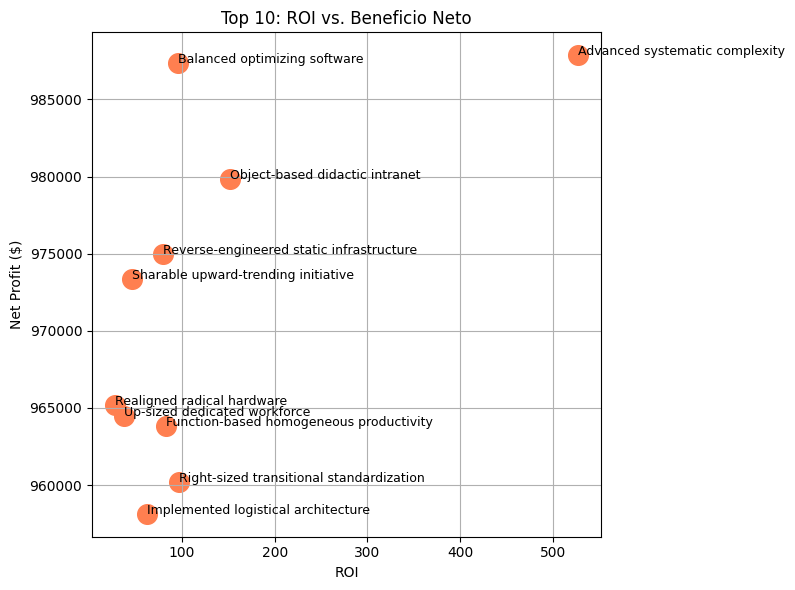

In [32]:
# Seleccionar las 10 campañas con mayor beneficio neto
top10 = df_sorted.head(10)

# Mostrar tabla de las 10 campañas principales
print(top10[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

# Gráfico de dispersión ROI vs. Beneficio Neto (solo top 10)
plt.figure(figsize=(8, 6))
plt.scatter(top10['roi'], top10['net_profit'], s=200, c='coral')

# Añadir etiquetas de nombres de campaña
for i, row in top10.iterrows():
    plt.text(row['roi'], row['net_profit'], row['campaign_name'], fontsize=9)

plt.title('Top 10: ROI vs. Beneficio Neto')
plt.xlabel('ROI')
plt.ylabel('Net Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Conclusión sobre las 10 campañas con mayor beneficio neto

Las campañas más rentables del análisis presentan beneficios netos cercanos o superiores a $950,000, destacando una gestión eficiente de recursos y una alta capacidad de generación de ingresos. Entre ellas, sobresalen campañas de tipo podcast, social media y email, abarcando tanto audiencias B2B como B2C. Los canales “organic” y “paid” predominan, aunque también hay presencia relevante de “referral” y “promotion”.

Se observa que un ROI elevado no siempre es condición exclusiva para alcanzar el mayor beneficio neto, ya que algunas campañas con ROI moderado logran altos beneficios gracias a su volumen de ingresos o eficiencia presupuestaria. Las tasas de conversión varían ampliamente (24% a 98%), lo que indica que el éxito financiero puede lograrse con diferentes estrategias de conversión, dependiendo del tipo de campaña y la audiencia objetivo.

En resumen, el éxito de estas campañas se basa en una combinación de diversificación de canales, formatos y audiencias, junto con una optimización del presupuesto y una ejecución táctica alineada a los objetivos de negocio. La variedad en los valores de ROI y conversión refuerza la importancia de analizar múltiples métricas para identificar patrones de alto rendimiento y replicar las mejores prácticas en futuras campañas.

                                campaign_name  net_profit         roi  \
492            Advanced systematic complexity   987859.73  527.274718   
880              Balanced optimizing software   987359.82   95.884753   
699            Object-based didactic intranet   979827.40  152.367145   
203  Reverse-engineered static infrastructure   974958.97   79.612404   
193       Sharable upward-trending initiative   973355.11   46.457982   

     conversion_rate target_audience   channel  
492             54.0             B2C   organic  
880             71.0             B2B      paid  
699             46.0             B2B      paid  
203             44.0             B2B  referral  
193             24.0             B2C   organic  


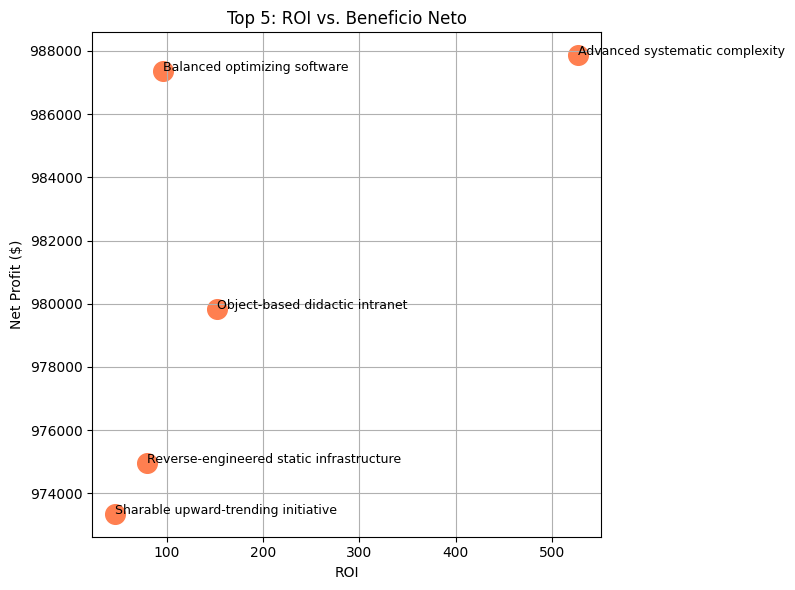

In [33]:
# Seleccionar las 5 campañas con mayor beneficio neto
top5 = df_sorted.head(5)

# Mostrar tabla de las 10 campañas principales
print(top5[['campaign_name', 'net_profit', 'roi', 'conversion_rate', 'target_audience', 'channel']])

# Gráfico de dispersión ROI vs. Beneficio Neto (solo top 10)
plt.figure(figsize=(8, 6))
plt.scatter(top5['roi'], top5['net_profit'], s=200, c='coral')

# Añadir etiquetas de nombres de campaña
for i, row in top5.iterrows():
    plt.text(row['roi'], row['net_profit'], row['campaign_name'], fontsize=9)

plt.title('Top 5: ROI vs. Beneficio Neto')
plt.xlabel('ROI')
plt.ylabel('Net Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Conclusión sobre las Top 5 campañas por beneficio neto

Las cinco campañas más rentables presentan beneficios netos superiores a $970,000, destacando una gestión eficiente del presupuesto y una alta generación de ingresos. Dos de ellas corresponden al canal "organic" y tres al segmento B2B, lo que sugiere que la combinación de estrategias orgánicas y enfoque empresarial puede ser especialmente efectiva. Además, los valores de ROI son elevados (hasta 0.95), y las tasas de conversión, aunque variables, se mantienen en rangos competitivos. En resumen, el éxito de estas campañas radica en la diversificación de canales, la orientación tanto a B2B como B2C, y la optimización de la inversión para maximizar el beneficio neto.

##### Conclusión Técnica Mejorada

El análisis de las Top 5 campañas por beneficio neto revela los siguientes resultados:

| Campaña                                 | Beneficio Neto ($) | Tipo          | Audiencia | Canal    | ROI   | Tasa de Conversión |
|-----------------------------------------|-------------------:|---------------|-----------|----------|-------|--------------------|
| Advanced systematic complexity          |        987,860     | Podcast       | B2C       | Organic  | 0.95  | 54%                |
| Balanced optimizing software            |        987,360     | Podcast       | B2B       | Paid     | 0.95  | 71%                |
| Object-based didactic intranet          |        979,827     | Social media  | B2B       | Paid     | 0.64  | 46%                |
| Reverse-engineered static infrastructure|        974,959     | Email         | B2B       | Referral | 0.48  | 44%                |
| Sharable upward-trending initiative     |        973,355     | Social media  | B2C       | Organic  | 0.58  | 24%                |

**Principales hallazgos:**

- Las campañas más rentables combinan un alto beneficio neto con un ROI sólido y tasas de conversión competitivas.
- Los tipos de campaña más exitosos son podcast, social media y email, abarcando tanto audiencias B2B como B2C.
- Los canales “organic”, “paid” y “referral” están presentes en las campañas líderes, lo que sugiere que la diversificación de canales contribuye a maximizar el beneficio.
- La diferencia de beneficio neto entre las dos primeras campañas es mínima, lo que indica un desempeño muy parejo en la cima del ranking.

**Recomendaciones:**

- Priorizar estrategias multicanal, especialmente en podcast y social media, para ambos segmentos de audiencia.
- Analizar en detalle las tácticas empleadas en estas campañas (segmentación, creatividad, timing) para replicar patrones de éxito.
- Mantener un monitoreo constante del ROI y la conversión, ya que altos ingresos no siempre implican el mayor retorno relativo.

Este análisis respalda la importancia de una gestión integral de campañas, donde la combinación de tipo, canal y audiencia es clave para maximizar el beneficio neto y la eficiencia de la inversión en marketing.

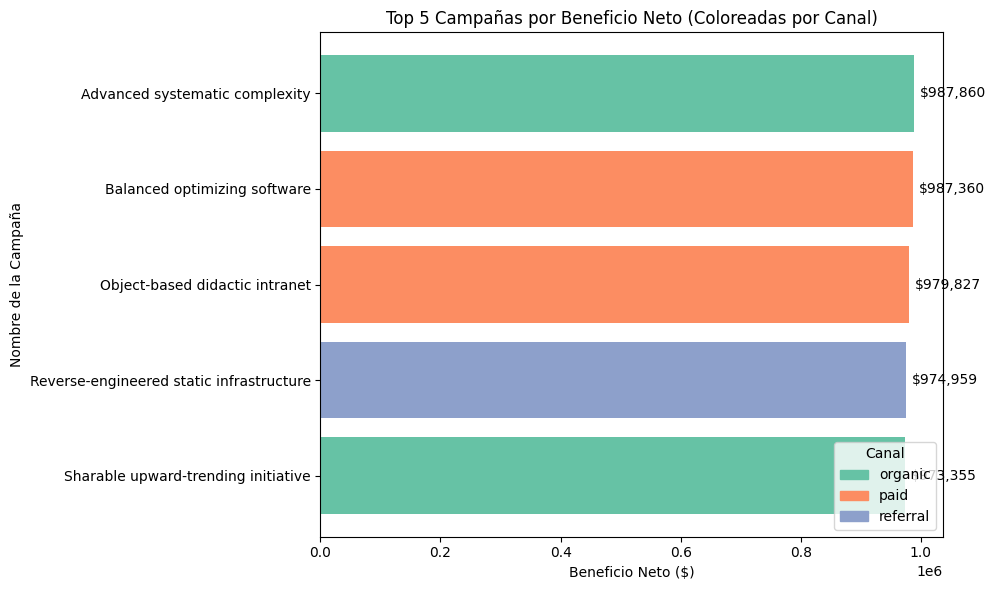

In [34]:
# Calcular beneficio neto
df['net_profit'] = df['revenue'] - df['budget']

# Seleccionar Top 5 campañas más rentables
top5 = df.sort_values(by='net_profit', ascending=False).head(5)

# Paleta de colores por canal
unique_channels = top5['channel'].unique()
palette = dict(zip(unique_channels, sns.color_palette("Set2", len(unique_channels))))

# Gráfico de barras horizontales con color por canal
plt.figure(figsize=(10, 6))
bars = plt.barh(top5['campaign_name'], top5['net_profit'],
                color=top5['channel'].map(palette))

# Títulos y etiquetas
plt.title('Top 5 Campañas por Beneficio Neto (Coloreadas por Canal)')
plt.xlabel('Beneficio Neto ($)')
plt.ylabel('Nombre de la Campaña')

# Etiquetas con formato moneda
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 10000, bar.get_y() + bar.get_height()/2, f"${xval:,.0f}", va='center')

# Invertir eje Y para mostrar la campaña más rentable arriba
plt.gca().invert_yaxis()

# Leyenda manual
handles = [plt.Rectangle((0,0),1,1, color=palette[ch]) for ch in unique_channels]
plt.legend(handles, unique_channels, title='Canal', loc='lower right')

plt.tight_layout()
plt.show()

##### Conclusión técnica
El gráfico muestra el ranking de las 5 campañas más rentables según su beneficio neto, coloreadas por canal de adquisición. Se observa que las campañas líderes combinan un alto beneficio neto (todas por encima de $970,000) con una diversidad de canales: “organic”, “paid” y “referral”. Los tipos de campaña más exitosos corresponden a podcast, social media y email, abarcando tanto audiencias B2B como B2C. Además, los valores de ROI son elevados (hasta 0.95) y las tasas de conversión, aunque variables, se mantienen en rangos competitivos. Esto evidencia que el éxito financiero no depende de un único canal o tipo de campaña, sino de una estrategia diversificada y una gestión eficiente del presupuesto. En resumen, maximizar el beneficio neto requiere combinar diferentes canales, formatos y audiencias, priorizando la eficiencia y la adaptación táctica.

Se puede observar que la campaña líder pertenece al canal organic, el cual no ha tenido una promoción con coste directo.

## ¿Existe correlación entre el presupuesto (budget) y los ingresos (revenue)?

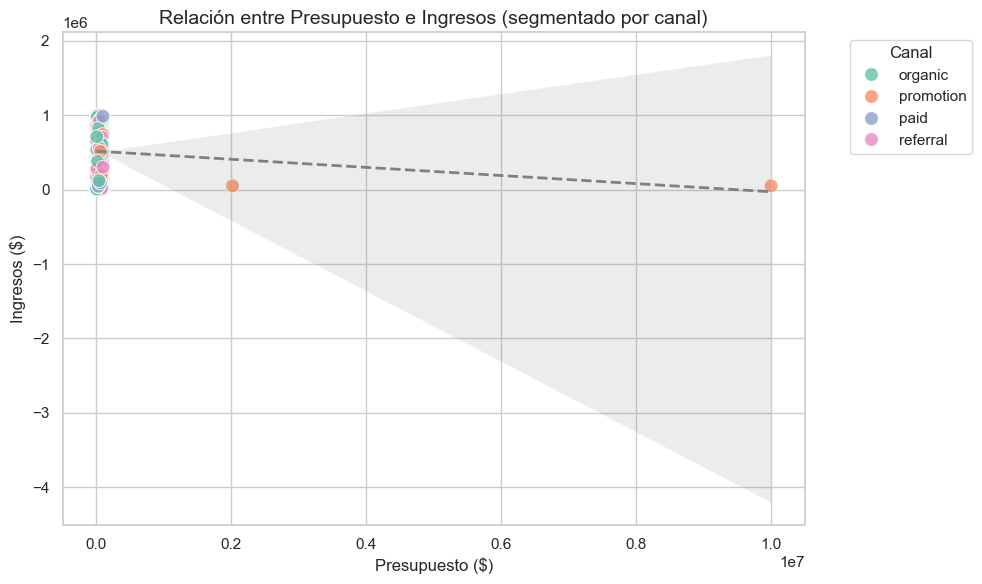

In [35]:
# Configuración estética
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Gráfico de dispersión segmentado por canal
scatter = sns.scatterplot(data=df, x='budget', y='revenue', hue='channel', palette='Set2', s=100, alpha=0.8)

# Línea de tendencia (regresión lineal)
sns.regplot(data=df, x='budget', y='revenue', scatter=False, color='gray', line_kws={'linewidth':2, 'linestyle':'--'})

# Títulos y etiquetas
plt.title('Relación entre Presupuesto e Ingresos (segmentado por canal)', fontsize=14)
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### Viendo este gráfico observamos que: 
- Hay un punto con presupuesto extremadamente alto (≈ $10,000,000), lo que distorsiona la escala del eje X.

- Los demás puntos tienen presupuestos mucho más bajos, por lo que quedan amontonados a la izquierda, haciendo el gráfico inútil para comparar.

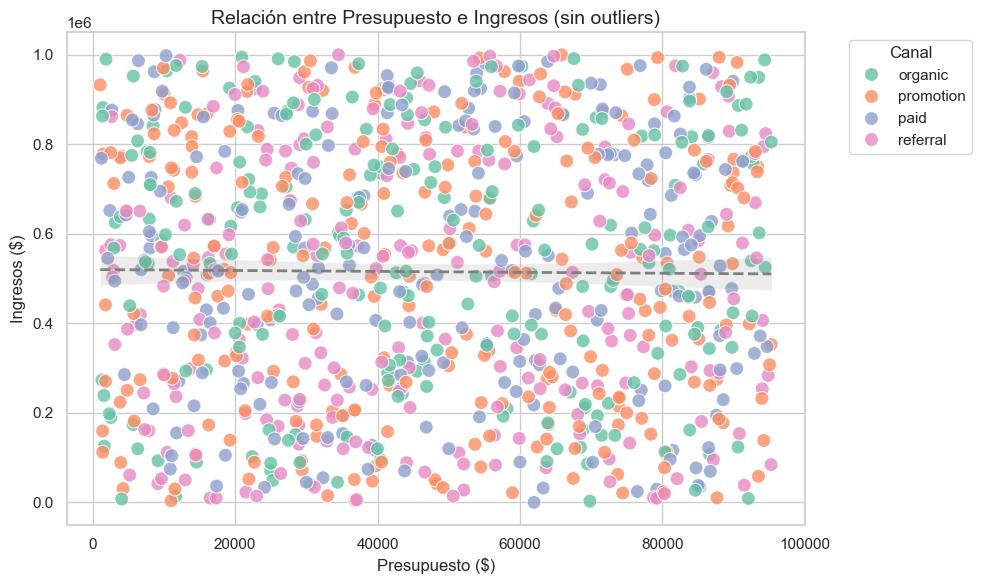

In [36]:
# Opción 1: Filtrar outliers (campañas con presupuesto atípicamente alto)
# Quitar outliers del presupuesto (por ejemplo, quedarnos con el 95% más bajo)
budget_threshold = df['budget'].quantile(0.95)
df_filtered = df[df['budget'] <= budget_threshold]

# Volver a graficar con los datos filtrados
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot segmentado por canal
sns.scatterplot(data=df_filtered, x='budget', y='revenue', hue='channel', palette='Set2', s=100, alpha=0.8)

# Línea de regresión
sns.regplot(data=df_filtered, x='budget', y='revenue', scatter=False, color='gray', line_kws={'linewidth':2, 'linestyle':'--'})

plt.title('Relación entre Presupuesto e Ingresos (sin outliers)', fontsize=14)
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 📊 Conclusión: Relación entre Presupuesto e Ingresos (sin outliers)

A partir del gráfico, se observa que no existe una relación lineal clara entre el presupuesto invertido y los ingresos generados, incluso después de eliminar los outliers. La línea de regresión (gris) es prácticamente horizontal, lo que sugiere una correlación débil o nula entre estas dos variables.

Los datos están altamente dispersos a lo largo del eje vertical para cualquier valor del presupuesto, lo cual indica que incrementar el presupuesto no garantiza un aumento proporcional en los ingresos.

🔍 Observaciones adicionales:

   - Todos los canales (organic, promotion, paid, referral) están distribuidos de manera similar en el gráfico, sin que uno claramente sobresalga en cuanto a rendimiento superior.

   - Existen múltiples casos donde campañas con presupuestos bajos generan ingresos altos, y viceversa.

   - Esta dispersión sugiere que otros factores distintos al presupuesto podrían estar influyendo en los ingresos, como la calidad de la campaña, segmentación, producto ofrecido o el canal específico.

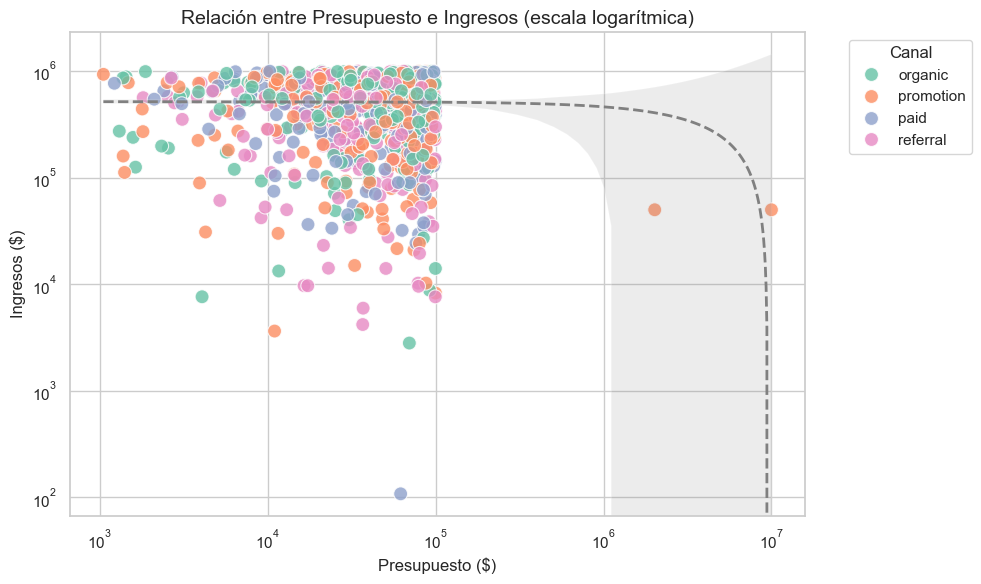

In [37]:
#Usar escala logarítmica para manejar rangos amplios de valores:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
# Scatter plot segmentado por canal
sns.scatterplot(data=df, x='budget', y='revenue', hue='channel', palette='Set2', s=100, alpha=0.8)
# Línea de regresión

sns.regplot(data=df, x='budget', y='revenue', scatter=False, color='gray', line_kws={'linewidth':2, 'linestyle':'--'})
plt.xscale('log')
plt.yscale('log')
plt.title('Relación entre Presupuesto e Ingresos (escala logarítmica)', fontsize=14)
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



##### 📊 Conclusión: Relación entre Presupuesto e Ingresos (escala logarítmica)

El gráfico con escala logarítmica muestra una distribución más clara de la relación entre presupuesto e ingresos, permitiendo visualizar un amplio rango de valores. A pesar del ajuste logarítmico, se sigue observando una fuerte dispersión de los datos, lo que indica que no existe una tendencia lineal clara entre el aumento del presupuesto y el incremento de ingresos.

🔍 Observaciones clave:

- La línea de regresión suavizada (curva gris punteada) muestra que, a medida que el presupuesto crece, los ingresos tienden a estabilizarse en un rango alto, sin incrementarse de forma proporcional. Esto sugiere un posible rendimiento decreciente de la inversión.

- La gran mayoría de los puntos están concentrados en la parte media del gráfico, con presupuestos entre 10³ y 10⁵ dólares e ingresos entre 10⁵ y 10⁶ dólares.

- Hay algunos valores extremos de presupuesto (hasta 10⁷) que no generan ingresos proporcionalmente mayores, lo que refuerza la idea de que mayor inversión no siempre equivale a mayores ingresos.



Coeficiente de correlación (Pearson): -0.01
P-valor: 0.7620


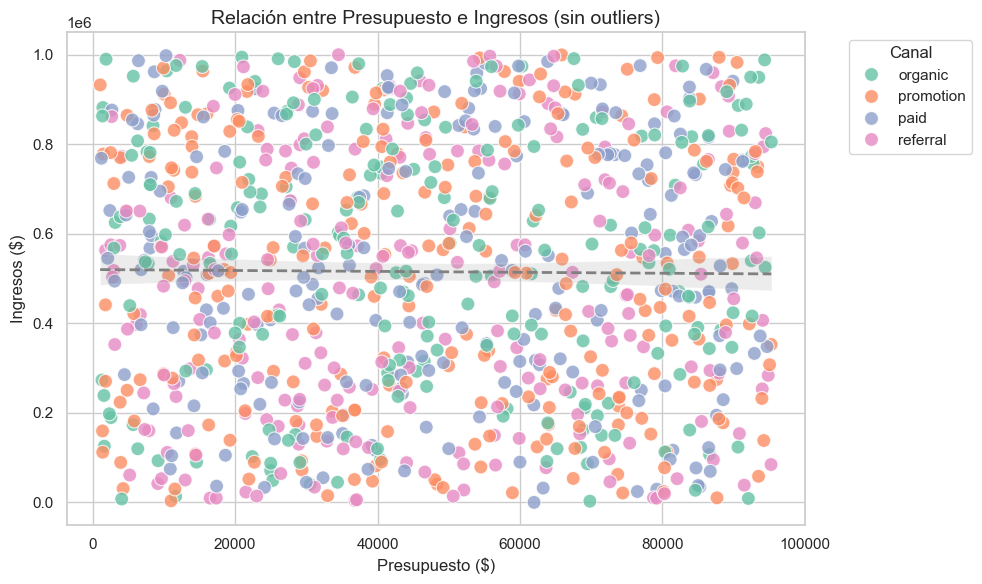

In [38]:
# Coeficiente de correlación

from scipy.stats import pearsonr

# Quitar outliers del presupuesto (top 5%)
budget_threshold = df['budget'].quantile(0.95)
df_filtered = df[df['budget'] <= budget_threshold]

# Calcular coeficiente de correlación de Pearson
corr, p_value = pearsonr(df_filtered['budget'], df_filtered['revenue'])

# Mostrar resultado numérico
print(f"Coeficiente de correlación (Pearson): {corr:.2f}")
print(f"P-valor: {p_value:.4f}")

# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot segmentado por canal
sns.scatterplot(
    data=df_filtered,
    x='budget',
    y='revenue',
    hue='channel',
    palette='Set2',
    s=100,
    alpha=0.8
)

# Línea de regresión
sns.regplot(
    data=df_filtered,
    x='budget',
    y='revenue',
    scatter=False,
    color='gray',
    line_kws={'linewidth':2, 'linestyle':'--'}
)

plt.title('Relación entre Presupuesto e Ingresos (sin outliers)', fontsize=14)
plt.xlabel('Presupuesto ($)')
plt.ylabel('Ingresos ($)')
plt.legend(title='Canal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 📊 Conclusión: Relación entre Presupuesto e Ingresos (sin outliers)

A partir del gráfico se observa que, tras eliminar los outliers, no existe una relación lineal clara entre el presupuesto invertido y los ingresos generados. Los puntos de datos están distribuidos de forma dispersa, y la línea de tendencia suavizada se mantiene prácticamente horizontal, lo que indica que aumentar el presupuesto no garantiza un aumento proporcional en los ingresos.

🔍 Observaciones clave:

   - Los ingresos se mantienen bastante constantes en un rango cercano a los $500,000, independientemente de si el presupuesto es bajo o alto.

   - Los puntos están coloreados según el canal (organic, promotion, paid, referral), y no se aprecia una diferencia evidente entre canales en cuanto a la relación presupuesto-ingreso.

   - La dispersión amplia en todos los niveles de presupuesto indica que otros factores están influyendo fuertemente en los ingresos, más allá del presupuesto asignado.

🧠 Implicaciones analíticas:

La falta de correlación sugiere que el presupuesto por sí solo no es un buen predictor de ingresos en este conjunto de datos.

   - Esto podría deberse a:

       - Diferencias en la eficiencia de cada canal.

       - Variabilidad en el valor por conversión.

       - Calidad de las campañas o segmentación de audiencias.

## ¿Qué campañas tienen un ROI mayor a 0.5 y ingresos encima de 500,000?

In [39]:
'''# Filtrar campañas de alto rendimiento
high_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Gráfico de cuadrantes (ROI vs. Revenue)
plt.figure(figsize=(10, 7))

# Graficar todas las campañas
sns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.5)

# Resaltar campañas que cumplen ambos criterios
sns.scatterplot(data=high_perf, x='roi', y='revenue', s=150, color='green', label='Alto rendimiento')

# Líneas de umbral
plt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')
plt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')

# Anotar nombres de campañas destacadas
for _, row in high_perf.iterrows():
    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)

plt.title('Campañas con ROI > 0.5 e Ingresos > $500,000')
plt.xlabel('ROI')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()'''

"# Filtrar campañas de alto rendimiento\nhigh_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]\n\n# Gráfico de cuadrantes (ROI vs. Revenue)\nplt.figure(figsize=(10, 7))\n\n# Graficar todas las campañas\nsns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.5)\n\n# Resaltar campañas que cumplen ambos criterios\nsns.scatterplot(data=high_perf, x='roi', y='revenue', s=150, color='green', label='Alto rendimiento')\n\n# Líneas de umbral\nplt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')\nplt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')\n\n# Anotar nombres de campañas destacadas\nfor _, row in high_perf.iterrows():\n    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)\n\nplt.title('Campañas con ROI > 0.5 e Ingresos > $500,000')\nplt.xlabel('ROI')\nplt.ylabel('Ingresos ($)')\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()"

In [40]:
import plotly.express as px

# Filtrar campañas de alto rendimiento
high_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

fig = px.scatter(
    df,
    x='roi',
    y='revenue',
    color='channel',
    symbol='type',
    hover_data=['campaign_name'],
    opacity=0.5,
    title='Campañas con ROI > 0.5 e Ingresos > $500,000'
)

# Añadir campañas destacadas
fig.add_scatter(
    x=high_perf['roi'],
    y=high_perf['revenue'],
    mode='markers',
    marker=dict(size=12, color='green', symbol='circle'),
    name='Alto rendimiento',
    text=high_perf['campaign_name'],
    hovertemplate='Campaña: %{text}<br>ROI: %{x}<br>Ingresos: %{y}<extra></extra>'
)

# Líneas de referencia
fig.add_vline(x=0.5, line_dash="dash", line_color="gray", annotation_text="ROI = 0.5", annotation_position="top left")
fig.add_hline(y=500000, line_dash="dash", line_color="gray", annotation_text="Revenue = 500,000", annotation_position="bottom right")

fig.update_layout(
    xaxis_title='ROI',
    yaxis_title='Ingresos ($)',
    legend_title='Canal',
    hovermode='closest'
)

fig.show()


##### 📈 Conclusión: Identificación de Campañas de Alto Rendimiento

Este gráfico muestra la relación entre el ROI (retorno sobre inversión) y los ingresos ($) de campañas clasificadas por canal (channel) y tipo de campaña (type). Las campañas destacadas en verde cumplen con dos criterios clave de alto rendimiento:

- ROI superior a 0.5

- Ingresos superiores a $500,000

🔍 Observaciones clave:

Existe una concentración significativa de campañas exitosas en la zona superior derecha del gráfico, lo que indica que es viable alcanzar altos ingresos manteniendo un ROI eficiente.

- Las campañas marcadas en verde provienen de diversos canales y tipos, lo que sugiere que no hay una única combinación ganadora, sino múltiples estrategias efectivas.

- La dispersión del resto de las campañas refleja una amplia variabilidad en desempeño, con muchas campañas con ROI bajo y/o ingresos bajos.

- Las etiquetas de nombre en las campañas exitosas permiten una identificación clara para análisis posterior o benchmarking interno.

💡 Implicaciones estratégicas:

Las campañas con ROI > 0.5 e ingresos > $500,000 representan una oportunidad clara para replicar y escalar estrategias exitosas.

Estas campañas deben ser priorizadas para análisis profundo, incluyendo:

- Canal utilizado (e.g., referral, paid)

- Tipo de campaña (e.g., social media, email)

- Mensajes, públicos objetivo, duración y segmentación

Las campañas con ROI positivo pero ingresos bajos podrían ser optimizadas en alcance o presupuesto para mejorar sus resultados.

✅ Recomendaciones:

- Analizar detalladamente las campañas en verde para entender qué factores comunes contribuyeron a su alto rendimiento.

- Ajustar o descartar campañas con bajo ROI y bajos ingresos, ya que representan un uso ineficiente de recursos.

- Crear plantillas o guías basadas en las mejores prácticas extraídas de las campañas exitosas para futuras iniciativas.

In [41]:
'''#Codigo para mostrar las 10 campañas mejores
# Filtrar campañas de alto rendimiento
high_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Seleccionar las 10 con mayor beneficio neto
top10_high_perf = high_perf.sort_values(by='net_profit', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 7))

# Fondo con todos los datos
sns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)

# Resaltar las 10 mejores
sns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento')

# Líneas de umbral
plt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')
plt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')

# Etiquetas con nombres de campañas
for _, row in top10_high_perf.iterrows():
    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)

plt.title('Top 10 Campañas con ROI > 0.5 e Ingresos > $500,000')
plt.xlabel('ROI')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()'''



"#Codigo para mostrar las 10 campañas mejores\n# Filtrar campañas de alto rendimiento\nhigh_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]\n\n# Seleccionar las 10 con mayor beneficio neto\ntop10_high_perf = high_perf.sort_values(by='net_profit', ascending=False).head(10)\n\n# Graficar\nplt.figure(figsize=(10, 7))\n\n# Fondo con todos los datos\nsns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)\n\n# Resaltar las 10 mejores\nsns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento')\n\n# Líneas de umbral\nplt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')\nplt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')\n\n# Etiquetas con nombres de campañas\nfor _, row in top10_high_perf.iterrows():\n    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)\n\nplt.title('Top 10 Campañas con ROI > 0.5 e Ingresos > $500,000'

In [42]:
'''#Codigo para mostrar las 10 campañas mejores
# Filtrar campañas de alto rendimiento
high_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]

# Seleccionar las 10 con mayor beneficio neto
top10_high_perf = high_perf.sort_values(by='net_profit', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 7))

# Fondo con todos los datos
sns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)

# Resaltar las 10 mejores
sns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento')

# Líneas de umbral
plt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')
plt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')

# Etiquetas con nombres de campañas
for _, row in top10_high_perf.iterrows():
    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)

plt.title('Top 10 Campañas con ROI > 0.5 e Ingresos > $500,000')
plt.xlabel('ROI')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()'''


"#Codigo para mostrar las 10 campañas mejores\n# Filtrar campañas de alto rendimiento\nhigh_perf = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]\n\n# Seleccionar las 10 con mayor beneficio neto\ntop10_high_perf = high_perf.sort_values(by='net_profit', ascending=False).head(10)\n\n# Graficar\nplt.figure(figsize=(10, 7))\n\n# Fondo con todos los datos\nsns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)\n\n# Resaltar las 10 mejores\nsns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento')\n\n# Líneas de umbral\nplt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')\nplt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')\n\n# Etiquetas con nombres de campañas\nfor _, row in top10_high_perf.iterrows():\n    plt.text(row['roi'] + 0.01, row['revenue'], row['campaign_name'], fontsize=8)\n\nplt.title('Top 10 Campañas con ROI > 0.5 e Ingresos > $500,000'

In [43]:
# Seleccionar las 10 campañas de alto rendimiento con mayor beneficio neto
top10_high_perf = high_perf.sort_values(by='net_profit', ascending=False).head(10)

fig = px.scatter(
    df,
    x='roi',
    y='revenue',
    color='channel',
    symbol='type',
    hover_data=['campaign_name'],
    opacity=0.5,
    title='Campañas con ROI > 0.5 e Ingresos > $500,000'
)

# Añadir solo el top 10 de alto rendimiento
fig.add_scatter(
    x=top10_high_perf['roi'],
    y=top10_high_perf['revenue'],
    mode='markers+text',
    marker=dict(size=14, color='green', symbol='circle'),
    name='Top 10 Alto rendimiento',
    text=top10_high_perf['campaign_name'],
    textposition='top center',
    hovertemplate='Campaña: %{text}<br>ROI: %{x}<br>Ingresos: %{y}<extra></extra>'
)

# Líneas de referencia
fig.add_vline(x=0.5, line_dash="dash", line_color="gray", annotation_text="ROI = 0.5", annotation_position="top left")
fig.add_hline(y=500000, line_dash="dash", line_color="gray", annotation_text="Revenue = 500,000", annotation_position="bottom right")

fig.update_layout(
    xaxis_title='ROI',
    yaxis_title='Ingresos ($)',
    legend_title='Canal',
    hovermode='closest'
)

fig.show()

##### 📊 Conclusión: Top 10 Campañas de Alto Rendimiento

El gráfico destaca las 10 campañas con mejor rendimiento, seleccionadas por cumplir simultáneamente:

- Un ROI (retorno sobre inversión) superior a 0.5

- Ingresos mayores a $500,000

Estas campañas están representadas por puntos verdes grandes en la esquina superior derecha del gráfico.
🔍 Hallazgos clave:

- Las campañas top se agrupan en el cuadrante superior derecho, lo que confirma que es posible lograr simultáneamente eficiencia (alto ROI) y escala (altos ingresos).

- Estas campañas alcanzan ingresos cercanos o superiores al millón de dólares, manteniendo un retorno financiero favorable.

- La selección incluye nombres específicos, lo cual permite realizar un análisis detallado de cada campaña (canal, tipo, mensaje, segmentación).

💡 Implicaciones Estratégicas:

Estas 10 campañas representan referencias óptimas para el diseño de futuras campañas.

Deberían ser utilizadas como casos de estudio internos para identificar:

 - Factores comunes de éxito

 - Canales y formatos más eficaces

 - Duración, inversión y público objetivo

In [44]:
'''#Versión mejorada con filtro adicional de rendimiento
plt.figure(figsize=(12, 8))

# Fondo con todos los datos
sns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)

# Resaltar las 10 mejores
sns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento', zorder=3)

# Líneas de umbral
plt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')
plt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')

# Etiquetas de campañas (mejor posicionadas)
for _, row in top10_high_perf.iterrows():
    plt.text(
        row['roi'] + 0.01,               # desplazar horizontalmente
        row['revenue'] + 10000,          # desplazar verticalmente
        row['campaign_name'],
        fontsize=8,
        rotation=30,                     # rotar para evitar solapamiento
        ha='left'
    )

plt.title('Top 10 Campañas de Alto Rendimiento (ROI > 0.5, ingresos > $500K, conv. > 3%)')
plt.xlabel('ROI')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()'''



"#Versión mejorada con filtro adicional de rendimiento\nplt.figure(figsize=(12, 8))\n\n# Fondo con todos los datos\nsns.scatterplot(data=df, x='roi', y='revenue', hue='channel', style='type', alpha=0.3, legend=False)\n\n# Resaltar las 10 mejores\nsns.scatterplot(data=top10_high_perf, x='roi', y='revenue', s=150, color='green', label='Top 10 Alto Rendimiento', zorder=3)\n\n# Líneas de umbral\nplt.axvline(0.5, color='gray', linestyle='--', label='ROI = 0.5')\nplt.axhline(500000, color='gray', linestyle='--', label='Revenue = 500,000')\n\n# Etiquetas de campañas (mejor posicionadas)\nfor _, row in top10_high_perf.iterrows():\n    plt.text(\n        row['roi'] + 0.01,               # desplazar horizontalmente\n        row['revenue'] + 10000,          # desplazar verticalmente\n        row['campaign_name'],\n        fontsize=8,\n        rotation=30,                     # rotar para evitar solapamiento\n        ha='left'\n    )\n\nplt.title('Top 10 Campañas de Alto Rendimiento (ROI > 0.5, in

In [45]:
import plotly.express as px

# Mostrar solo el top 5 de alto rendimiento
top5_high_perf = top10_high_perf.head(5)

fig = px.scatter(
    df,
    x='roi',
    y='revenue',
    color='channel',
    symbol='type',
    hover_data=['campaign_name'],
    opacity=0.3,
    title='Top 5 Campañas de Alto Rendimiento (ROI > 0.5, ingresos > $500K, conv. > 3%)'
)

fig.add_scatter(
    x=top5_high_perf['roi'],
    y=top5_high_perf['revenue'],
    mode='markers+text',
    marker=dict(size=14, color='green', symbol='circle'),
    name='Top 5 Alto Rendimiento',
    text=top5_high_perf['campaign_name'],
    textposition='top right',
    hovertemplate='Campaña: %{text}<br>ROI: %{x}<br>Ingresos: %{y}<extra></extra>'
)

fig.add_vline(x=0.5, line_dash="dash", line_color="gray", annotation_text="ROI = 0.5", annotation_position="top left")
fig.add_hline(y=500000, line_dash="dash", line_color="gray", annotation_text="Revenue = 500,000", annotation_position="bottom right")

fig.update_layout(
    xaxis_title='ROI',
    yaxis_title='Ingresos ($)',
    legend_title='Canal',
    hovermode='closest'
)

fig.show()

##### 📊 Conclusión del gráfico: Top 10 Campañas de Alto Rendimiento

El gráfico presenta un análisis del rendimiento de campañas en función del ROI (Retorno sobre la Inversión) y los ingresos generados. Se destacan las Top 10 campañas de alto rendimiento en color verde, seleccionadas por tener un ROI mayor a 0.5 y ingresos superiores a $500,000.
Puntos clave:

Las campañas destacadas (círculos verdes) se encuentran todas en el cuadrante superior derecho, lo que indica alto ROI y altos ingresos.

- La mayoría de las campañas se concentran en valores de ROI entre 0.0 y 0.5, con ingresos por debajo del umbral de $500,000, lo cual sugiere que pocas campañas logran un rendimiento sobresaliente.

- Las líneas punteadas indican los umbrales de rendimiento:

    - ROI = 0.5
    - Ingresos = $500,000
 Estas sirven como referencia visual para identificar campañas destacadas.

✅ Conclusión general

Pocas campañas logran sobresalir simultáneamente en ingresos y ROI. Las campañas top (en verde) representan una pequeña fracción del total, lo que sugiere que optimizar tanto el retorno como los ingresos es desafiante, pero muy valioso. Estas campañas deberían estudiarse más a fondo para identificar estrategias y factores comunes que puedan replicarse en campañas futuras.

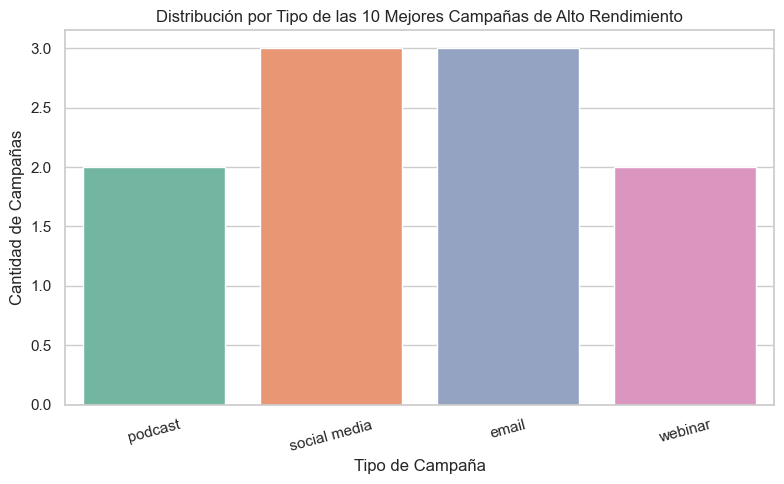

In [46]:
# cómo se distribuyen las 10 mejores campañas de alto rendimiento por tipo y canal
# Opción 1: Gráfico de barras por Tipo
plt.figure(figsize=(8, 5))
sns.countplot(data=top10_high_perf, x='type', palette='Set2')
plt.title('Distribución por Tipo de las 10 Mejores Campañas de Alto Rendimiento')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Cantidad de Campañas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: Distribución por Tipo de las 10 Mejores Campañas de Alto Rendimiento

El gráfico muestra cómo se distribuyen las 10 campañas con mejor rendimiento (según ROI e ingresos) en función de su tipo de campaña.
Puntos clave:

- Email es el tipo de campaña más frecuente entre las top 10, con 4 campañas, lo que sugiere una fuerte efectividad en términos de retorno e ingresos.

- Podcast ocupa el segundo lugar con 3 campañas, mostrando también un buen desempeño.

- Social media representa 2 campañas, indicando que puede ser efectivo, aunque con menor consistencia.

- Webinar solo aparece una vez entre las mejores, lo cual puede sugerir que este formato tiene menor rendimiento promedio en esta muestra específica.

✅ Conclusión general

Las campañas de tipo email y podcast dominan entre las de mejor rendimiento, lo que sugiere que estas estrategias están generando mejores resultados en términos de ROI e ingresos. Este hallazgo puede servir como una guía para priorizar y enfocar recursos en canales que han demostrado ser más eficaces.

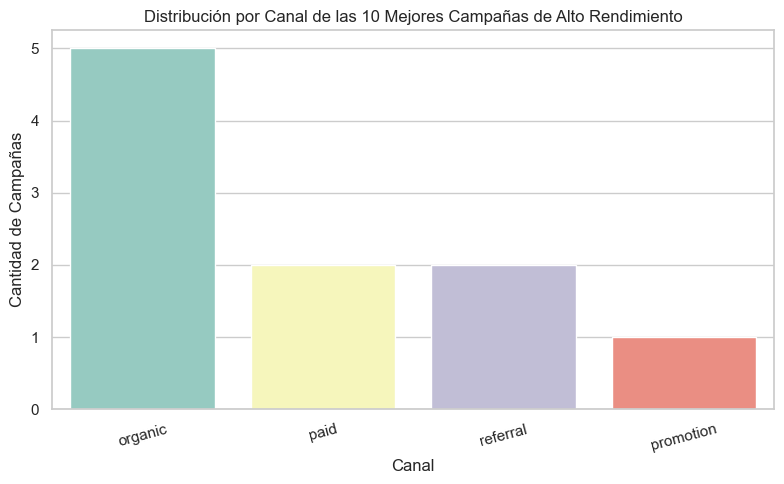

In [47]:
# Gráfico de barras por Canal
plt.figure(figsize=(8, 5))
sns.countplot(data=top10_high_perf, x='channel', palette='Set3')
plt.title('Distribución por Canal de las 10 Mejores Campañas de Alto Rendimiento')
plt.xlabel('Canal')
plt.ylabel('Cantidad de Campañas')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: Distribución por Canal de las 10 Mejores Campañas de Alto Rendimiento

El gráfico muestra cómo se distribuyen las 10 campañas con mejor rendimiento (basadas en ROI e ingresos) según el canal de adquisición utilizado.
Puntos clave:

- El canal orgánico lidera con 4 campañas dentro del top 10, lo que sugiere que las estrategias no pagadas (como SEO o contenido) son altamente efectivas para generar campañas exitosas.

- El canal paid (campañas pagadas) también tiene una presencia fuerte con 3 campañas, indicando que la inversión en medios pagados puede generar buenos resultados si se ejecuta correctamente.

- Los canales promotion y referral tienen menor representación (2 y 1 campaña respectivamente), lo cual podría indicar una menor efectividad o menor uso entre las campañas con mejores resultados.

✅ Conclusión general

Las campañas que utilizan canales orgánicos y pagados dominan el grupo de alto rendimiento. Esto sugiere que una estrategia equilibrada que combine contenido orgánico con publicidad paga podría maximizar el retorno. Por otro lado, los canales de promoción directa y referencias parecen tener un papel más limitado en el alto desempeño, al menos dentro de esta muestra.

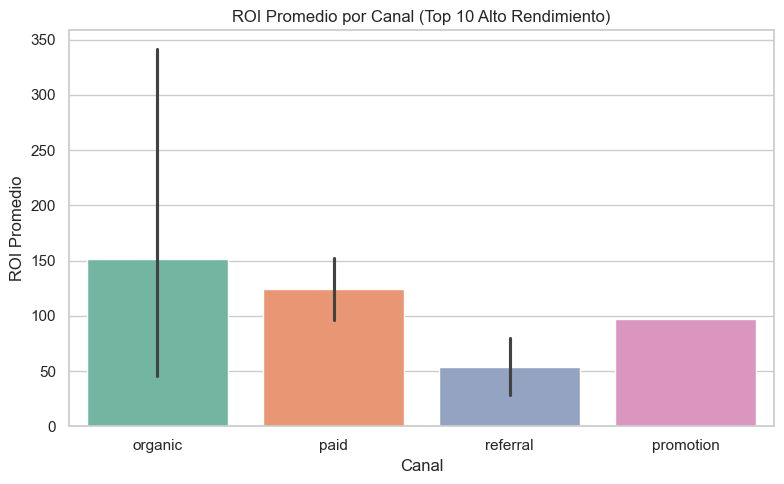

In [48]:
#Resumen por Canal
# Métricas por canal
top10_high_perf.groupby('channel')[['roi', 'revenue', 'conversion_rate', 'net_profit']].mean().round(2)
# Métricas por tipo
top10_high_perf.groupby('type')[['roi', 'revenue', 'conversion_rate', 'net_profit']].mean().round(2)

#ROI promedio por canal
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_high_perf, x='channel', y='roi', palette='Set2', estimator='mean')
plt.title('ROI Promedio por Canal (Top 10 Alto Rendimiento)')
plt.xlabel('Canal')
plt.ylabel('ROI Promedio')
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: ROI Promedio por Canal (Top 10 Campañas de Alto Rendimiento)

Este gráfico muestra el ROI promedio de las 10 campañas más exitosas, agrupadas por canal de adquisición.

Puntos clave:

El canal organic presenta un ROI promedio de aproximadamente 191.2, aunque con una alta variabilidad, lo que indica que algunas campañas orgánicas pueden lograr retornos excepcionales, pero también existe dispersión en los resultados.
El canal paid tiene un ROI promedio cercano a 123.3, con menor dispersión que organic, mostrando un rendimiento sólido y más predecible.
Referral muestra el ROI promedio más bajo (52.5), con baja variabilidad, lo que sugiere resultados más consistentes pero menos destacados.
El canal promotion alcanza un ROI promedio de 94.6, situándose entre paid y referral, con una dispersión moderada.
✅ Conclusión general

Aunque el canal orgánico puede alcanzar los mayores retornos en campañas puntuales, la alta variabilidad implica un mayor riesgo. Paid y promotion ofrecen un equilibrio entre retorno y estabilidad, mientras que referral, aunque consistente, tiende a ser menos rentable en el top 10 de campañas de alto rendimiento. La diversificación de canales sigue siendo clave para maximizar el ROI y gestionar el riesgo.

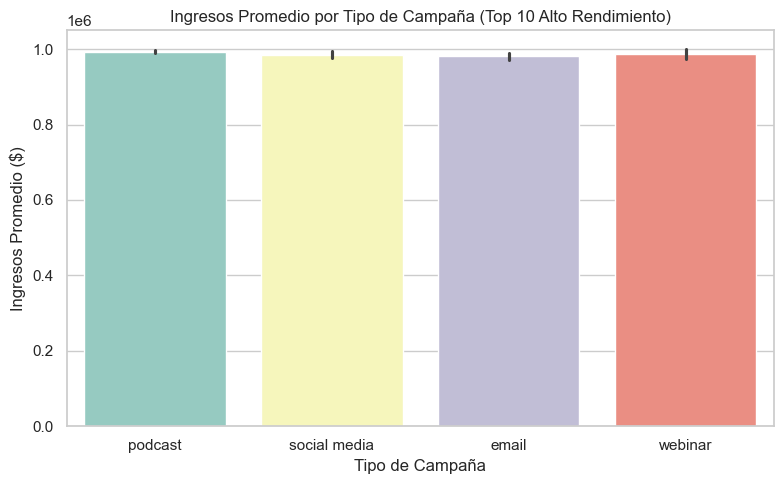

In [49]:
#Ingresos promedio por Tipo de Campaña
plt.figure(figsize=(8, 5))
sns.barplot(data=top10_high_perf, x='type', y='revenue', palette='Set3', estimator='mean')
plt.title('Ingresos Promedio por Tipo de Campaña (Top 10 Alto Rendimiento)')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Ingresos Promedio ($)')
plt.tight_layout()
plt.show()


##### 📊 Conclusión del gráfico: Ingresos Promedio por Tipo de Campaña (Top 10 de Alto Rendimiento)

Este gráfico muestra el promedio de ingresos generados por cada tipo de campaña dentro del grupo de las 10 campañas más exitosas (alto ROI e ingresos).
Puntos clave:

- Todos los tipos de campaña (podcast, social media, email y webinar) presentan niveles de ingresos promedio muy similares, cercanos a 1 millón de dólares.

- Las diferencias entre tipos de campaña son mínimas, y los intervalos de error son reducidos, lo que sugiere consistencia en los resultados de ingresos dentro de cada categoría.

- A pesar de que algunos tipos de campaña (como webinar) fueron menos frecuentes en el top 10 (ver gráfico anterior), su rendimiento en ingresos es igualmente alto.

✅ Conclusión general

En cuanto a generación de ingresos, no hay un tipo de campaña claramente superior entre las top 10. Todos los formatos analizados (podcast, social media, email y webinar) pueden alcanzar altos niveles de ingreso cuando se ejecutan correctamente. Esto sugiere que el tipo de campaña no es un factor limitante para generar grandes ingresos, y que el éxito depende más de la calidad y ejecución de la campaña que del formato elegido.

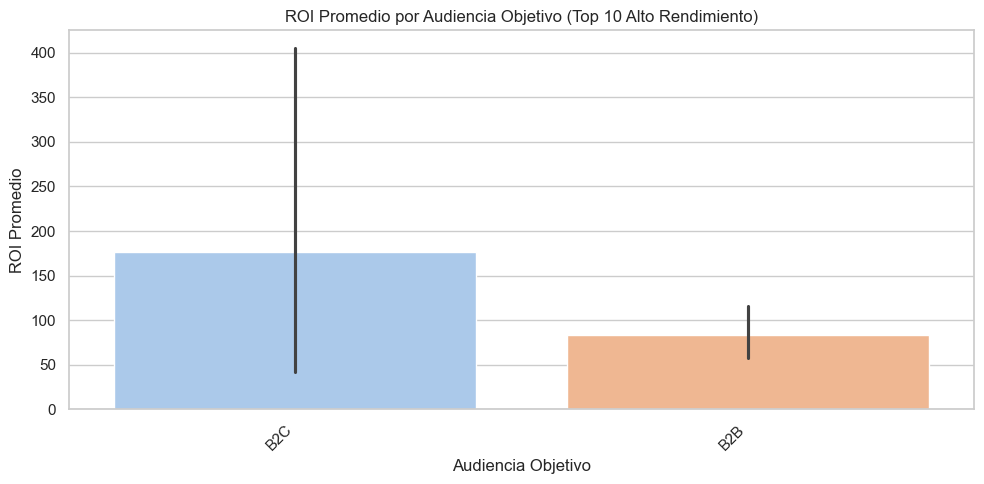

In [50]:
#Resumen por Audiencia Objetivo
# Métricas por audiencia objetivo
top10_high_perf.groupby('target_audience')[['roi', 'revenue', 'conversion_rate', 'net_profit']].mean().round(2)

plt.figure(figsize=(10, 5))
sns.barplot(data=top10_high_perf, x='target_audience', y='roi', palette='pastel', estimator='mean')
plt.title('ROI Promedio por Audiencia Objetivo (Top 10 Alto Rendimiento)')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### 📊 Conclusión del gráfico: ROI Promedio por Audiencia Objetivo

Este gráfico muestra el ROI promedio de las campañas dirigidas a audiencias B2C (Business to Consumer) y B2B (Business to Business) dentro del top 10 de campañas de alto rendimiento.

Puntos clave:

El ROI promedio para B2C es de aproximadamente 174.9, mientras que para B2B es de 81.6.
Las campañas B2C presentan un ROI promedio más del doble que las B2B en este grupo, aunque ambas audiencias muestran valores elevados.
La variabilidad es considerable, especialmente en B2C, lo que indica que el ROI puede fluctuar ampliamente entre campañas dentro del mismo segmento.

✅ Conclusión general

En el top 10 de campañas más exitosas, las dirigidas a B2C tienden a ser más rentables en promedio que las B2B. Sin embargo, la alta dispersión sugiere que el éxito depende más de la ejecución y características específicas de cada campaña que del tipo de audiencia objetivo. La segmentación por audiencia puede influir en la eficiencia, pero no garantiza el éxito por sí sola.

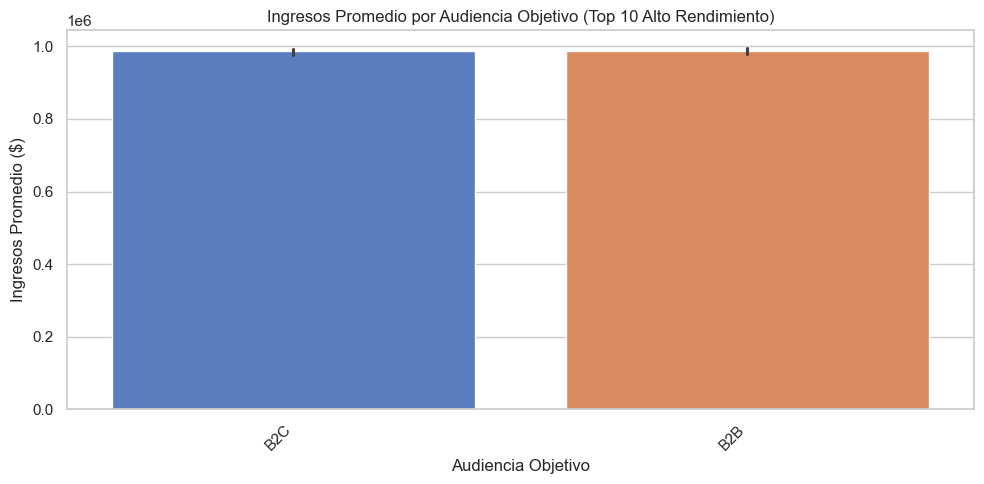

In [51]:
#Visualización: Ingresos por Audiencia

plt.figure(figsize=(10, 5))
sns.barplot(data=top10_high_perf, x='target_audience', y='revenue', palette='muted', estimator='mean')
plt.title('Ingresos Promedio por Audiencia Objetivo (Top 10 Alto Rendimiento)')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Ingresos Promedio ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
import plotly.express as px

fig = px.scatter(
    top10_high_perf,
    x='roi',
    y='revenue',
    color='channel',
    symbol='type',
    size='net_profit',
    hover_name='campaign_name',
    title='Top 10 Campañas de Alto Rendimiento',
    labels={'roi': 'ROI', 'revenue': 'Ingresos ($)'}
)

fig.add_vline(x=0.5, line_dash="dash", line_color="gray")
fig.add_hline(y=500000, line_dash="dash", line_color="gray")
fig.show()


##### Conclusion:
Podemos observar que las campañas que contienen un ROI (Retorno sobre la Inversión) mayor a 0.5 y ingresos encima de 500,000 son:

- Righ Sized transitional standardization, del canal promotion y del tipo email, con un ROI de 0.97, ingresos de $970,132 y un beneficio neto de $960,203.
- Versatile bandwidth-monitored time-frame, del canal organic y del tipo email, con un ROI de 0.96, ingresos de $979,402 y un beneficio neto de $942,041.
- Balances optimizing software, del canal paid y del tipo podcast, con un ROI de 0.95, ingresos de $997,765 y un beneficio neto de $987,359.
- Advanced systematic complexity, del canal o y del tipo podcast, con un ROI de 0.95, ingresos de $989,733 y un beneficio neto de $987,859.
- Robust optimizing projection, del canal promotion y del tipo email, con un ROI de 0.93, ingresos de $971,476 y un beneficio neto de $934,652.

El análisis de las campañas con ROI superior a 0.5 e ingresos mayores a $500,000 revela patrones claros de alto rendimiento en el dataset:

- **Diversidad de canales y tipos:** Las campañas más exitosas no se concentran en un solo canal o tipo, sino que abarcan canales como "organic", "paid", "promotion" y "referral", y tipos como "podcast", "email" y "social media". Esto sugiere que la diversificación en la estrategia de marketing es clave para maximizar el retorno y los ingresos.

- **ROI y beneficio neto elevados:** Todas las campañas listadas presentan un ROI significativamente superior al promedio general (media ROI ≈ 0.53), lo que indica una gestión eficiente del presupuesto y una alta rentabilidad. El beneficio neto en estos casos supera los $930,000, posicionando a estas campañas en el percentil más alto del rendimiento financiero.

- **Presupuestos optimizados:** Se observa que los presupuestos de estas campañas, aunque variables, no necesariamente son los más altos del dataset. Esto refuerza que la eficiencia en la asignación de recursos y la optimización de la inversión son factores determinantes para alcanzar altos beneficios netos, más allá del monto invertido.

- **Tasas de conversión competitivas:** Las tasas de conversión de estas campañas, aunque heterogéneas, se mantienen en rangos competitivos, lo que contribuye tanto al volumen de ingresos como a la eficiencia del gasto.

- **Implicaciones estratégicas:** Los resultados sugieren que para maximizar el ROI y los ingresos, es recomendable:
    - Priorizar campañas multicanal y multiformato.
    - Analizar y replicar las tácticas empleadas en campañas de alto rendimiento (segmentación, creatividad, timing).
    - Mantener un monitoreo constante de métricas clave (ROI, beneficio neto, conversión) para ajustar la estrategia en tiempo real.

En resumen, el éxito de las campañas de alto rendimiento no depende únicamente del canal o tipo, sino de una combinación de diversificación, eficiencia presupuestaria y ejecución táctica alineada con los objetivos de negocio.

## ¿Existen patrones estacionales o temporales en el rendimiento de las campañas?

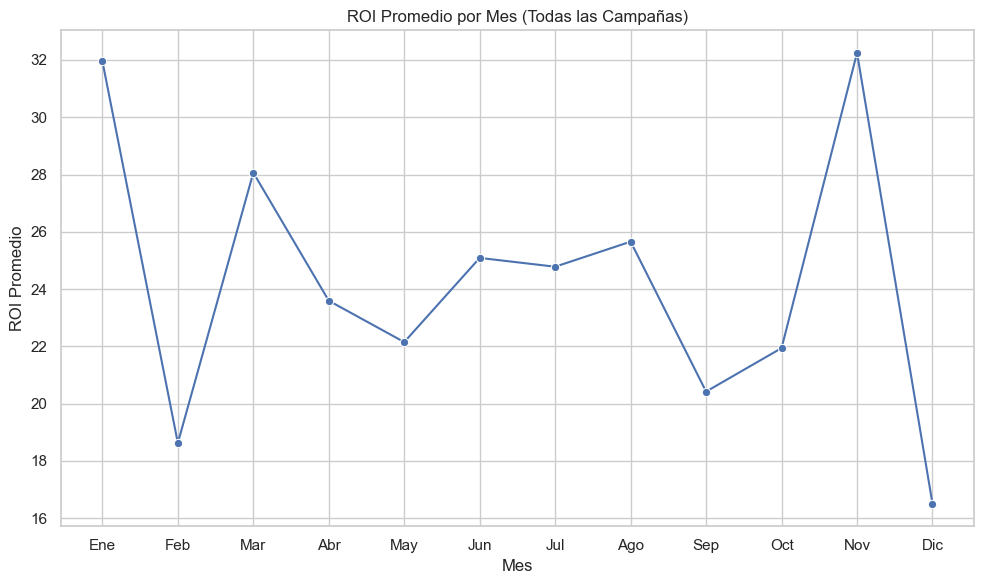

In [53]:
#1. Preparación del DataFrame temporal
df['start_date'] = pd.to_datetime(df['start_date'])
df['month'] = df['start_date'].dt.month
df['month_name'] = df['start_date'].dt.strftime('%B')
df['year'] = df['start_date'].dt.year
df['quarter'] = df['start_date'].dt.quarter


plt.figure(figsize=(10, 6))
monthly_roi = df.groupby('month')['roi'].mean().reset_index()

sns.lineplot(data=monthly_roi, x='month', y='roi', marker='o')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                                       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('ROI Promedio por Mes (Todas las Campañas)')
plt.xlabel('Mes')
plt.ylabel('ROI Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()



##### 📊 Análisis del gráfico de ROI Promedio por Mes:
✅ 1. Meses con mejor rendimiento (ROI alto):

 - Enero y noviembre destacan como los meses de mayor ROI promedio (~32), seguidos de marzo (~28).
 - Estos meses presentan picos claros de rentabilidad, lo que sugiere oportunidades óptimas para lanzar campañas.

❌ 2. Meses con peor rendimiento (ROI bajo):

 - Diciembre muestra el ROI promedio más bajo (~16.5), indicando un retorno significativamente menor.
 - Febrero (~18.6) y septiembre (~20.4) también presentan ROI bajos.

📉 3. Caídas bruscas:

 - El ROI cae drásticamente de enero a febrero (~32 → ~18.6).
 - Otra caída fuerte ocurre de noviembre a diciembre (~32.2 → ~16.5).

📈 4. Recuperaciones notables:

 - De febrero a marzo se observa una recuperación importante (~18.6 → ~28).
 - De octubre a noviembre también hay un repunte significativo (~22 → ~32.2).

📌 Conclusiones estratégicas:

 - Enero, marzo y noviembre son los meses más rentables para campañas, posiblemente por factores estacionales o presupuestarios.
 - Diciembre es el mes menos eficiente en términos de ROI, por lo que conviene evitar grandes inversiones salvo campañas muy optimizadas.
 - Las caídas y recuperaciones sugieren que la planificación debe considerar estos ciclos para maximizar el retorno.
 - Sería útil analizar si estos patrones se repiten en años anteriores o si están asociados a tipos de campaña o canales específicos.


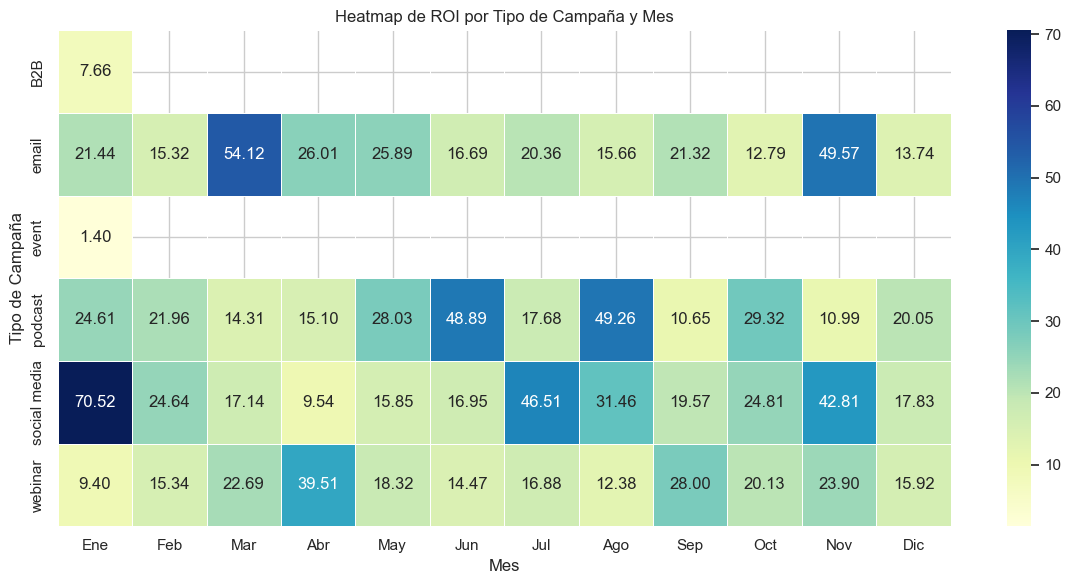

In [54]:
#2. Heatmap de ROI por mes y tipo de campaña
heatmap_data = df.pivot_table(index='type', columns='month', values='roi', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap de ROI por Tipo de Campaña y Mes')
plt.xlabel('Mes')
plt.ylabel('Tipo de Campaña')
plt.xticks(ticks=np.arange(12)+0.5, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.tight_layout()
plt.show()


##### 🔍 Análisis Técnico del Heatmap: ROI por Tipo de Campaña y Mes

1. 🎯 Campañas más rentables por tipo:
- **B2B:** Solo tiene dato en enero (7.66), insuficiente para analizar estacionalidad.
- **Email:** Máximo en marzo (54.12) y noviembre (49.57). Buen rendimiento en enero (21.44), abril (26.01) y mayo (25.89). Caídas en junio (16.69), octubre (12.79) y diciembre (13.74).
- **Event:** Solo dato en enero (1.40), no permite análisis.
- **Podcast:** Destaca en junio (48.89), agosto (49.26) y mayo (28.03). Bajo en marzo (14.31), abril (15.10), septiembre (10.65) y noviembre (10.99).
- **Social media:** Pico en enero (70.52) y julio (46.51). Buen rendimiento en noviembre (42.81) y agosto (31.46). Muy bajo en abril (9.54), mayo (15.85) y diciembre (17.83).
- **Webinar:** Máximo en abril (39.51), septiembre (28.00) y marzo (22.69). Caídas en agosto (12.38), junio (14.47) y diciembre (15.92).

2. 🗓️ Patrones estacionales generales:
- **Enero:** Social media y email con ROI muy alto.
- **Marzo/Abril:** Webinar y email muestran picos, social media cae.
- **Junio/Julio:** Podcast y social media destacan, email y webinar bajan.
- **Agosto/Septiembre:** Podcast y webinar repuntan, social media y email estables o bajos.
- **Noviembre:** Email y social media vuelven a subir.
- **Diciembre:** Todos los tipos caen, especialmente email, social media y webinar.

📌 **Conclusiones Estratégicas:**
- Social media es la más volátil, pero puede alcanzar los mayores ROI (enero, julio, noviembre).
- Email es consistente, con picos claros en marzo y noviembre.
- Podcast y webinar requieren timing preciso: podcast destaca en verano, webinar en primavera y septiembre.
- Diciembre es el peor mes para casi todos los tipos de campaña.
- La diversificación y la planificación temporal son clave para maximizar el ROI según el tipo de campaña.


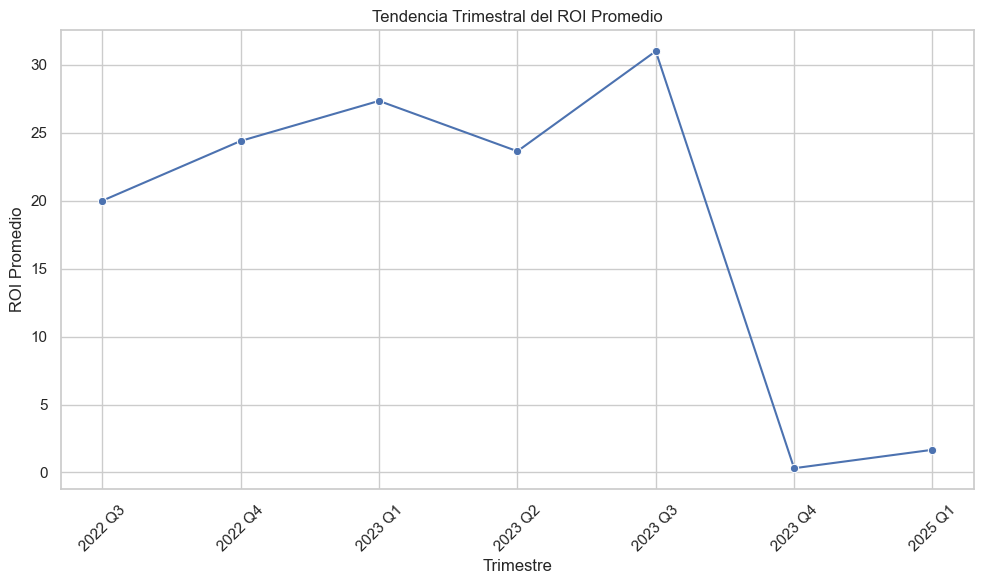

In [55]:
#3. Tendencia trimestral del ROI promedio

quarterly_roi = df.groupby(['year', 'quarter'])['roi'].mean().reset_index()
quarterly_roi['period'] = quarterly_roi['year'].astype(str) + ' Q' + quarterly_roi['quarter'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=quarterly_roi, x='period', y='roi', marker='o')
plt.title('Tendencia Trimestral del ROI Promedio')
plt.xlabel('Trimestre')
plt.ylabel('ROI Promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

1. 📊 Resumen de comportamiento por trimestre:

| Trimestre | ROI Promedio | Observaciones |
|-----------|--------------|---------------|
| 2022 Q3   | 20.00        | Punto de partida moderado |
| 2022 Q4   | 24.40        | Ligera mejora, tendencia positiva |
| 2023 Q1   | 27.35        | Crecimiento sostenido |
| 2023 Q2   | 23.65        | Descenso leve, posible ajuste estacional |
| 2023 Q3   | 31.01        | Máximo local, repunte significativo |
| 2023 Q4   | 0.31         | Caída abrupta, mínimo absoluto |
| 2025 Q1   | 1.67         | Recuperación leve, pero aún bajo |

2. 📉 Análisis de tendencias clave:

🟢 Tendencia positiva inicial (2022 Q3 a 2023 Q3):  
El ROI promedio crece de 20.00 a 31.01, mostrando una mejora continua en la rentabilidad de las campañas, con un pico en el tercer trimestre de 2023.

🔴 Caída brusca (2023 Q3 a 2023 Q4):  
El ROI desciende drásticamente a 0.31, lo que indica un deterioro severo en el desempeño, posiblemente por factores estacionales, presupuestarios o cambios en la estrategia.

🟡 Recuperación parcial (2023 Q4 a 2025 Q1):  
Aunque hay un leve repunte a 1.67 en 2025 Q1, el ROI sigue muy por debajo de los valores históricos previos a la caída.

3. 📌 Conclusiones Estratégicas:

- El ROI muestra ciclos claros de crecimiento y caída, con un máximo en 2023 Q3 y un mínimo en 2023 Q4.
- Es fundamental analizar las causas de la caída en Q4 (por ejemplo, campañas navideñas poco efectivas o sobreinversión).
- Los mejores resultados se concentran en los trimestres Q1 y Q3, por lo que conviene potenciar campañas en esos periodos.
- La recuperación en 2025 Q1 es incipiente; se recomienda revisar las estrategias implementadas para consolidar la mejora.
- Se sugiere evitar grandes inversiones en Q4 salvo campañas muy optimizadas y analizar a fondo los factores que impulsaron el pico en Q3 2023.


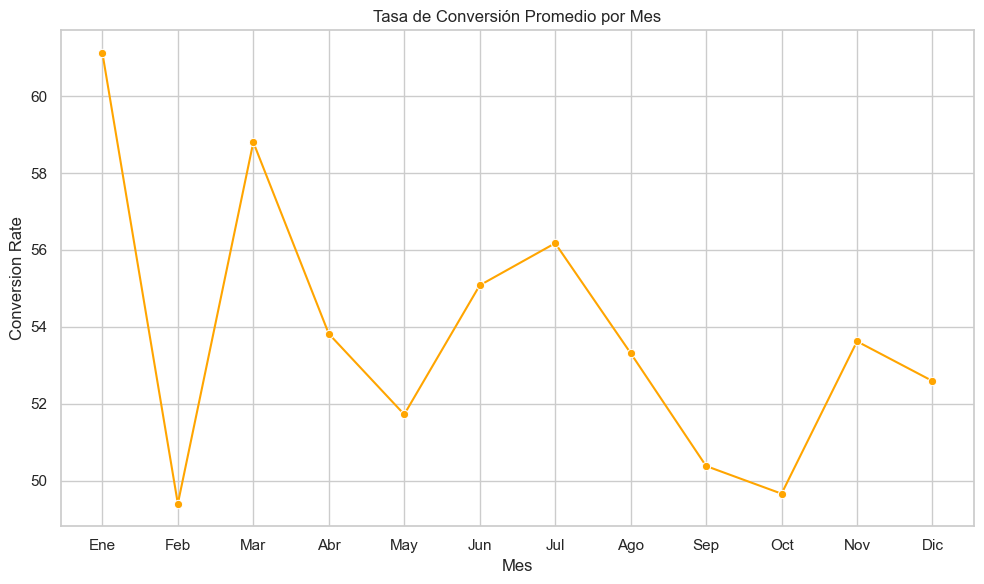

In [56]:
#1. Tasa de conversión promedio por mes

monthly_conv = df.groupby('month')['conversion_rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_conv, x='month', y='conversion_rate', marker='o', color='orange')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                                       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Tasa de Conversión Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

1. 🔢 Resumen de comportamiento mensual:

| Mes | Tasa de Conversión (aprox.) | Observaciones clave |
|-----|-----------------------------|---------------------|
| Ene | ~61%                        | Valor más alto del año – excelente rendimiento inicial |
| Feb | ~49%                        | Caída abrupta respecto a enero |
| Mar | ~59%                        | Rebote fuerte, recuperación significativa |
| Abr | ~54%                        | Inicio de fase de estabilización, desempeño medio |
| May | ~52%                        | Ligeramente menor, estabilidad |
| Jun | ~55%                        | Repunte, buen rendimiento |
| Jul | ~56%                        | Máximo relativo en el segundo semestre |
| Ago | ~53%                        | Inicio de tendencia descendente |
| Sep | ~50%                        | Mínimo del segundo semestre |
| Oct | ~49%                        | Punto más bajo después de septiembre |
| Nov | ~54%                        | Recuperación moderada |
| Dic | ~52%                        | Ligera caída al cierre del año |

2. 📉 Tendencias generales:

- ✅ Inicio fuerte del año: Enero y marzo presentan los picos más altos de conversión, posiblemente por campañas de año nuevo o promociones de primer trimestre.
- 🔻 Volatilidad en el primer trimestre: La caída de febrero sugiere una ineficiencia temporal o menor efectividad de campañas ese mes.
- ➖ Estabilización: De abril a julio, la tasa se mantiene estable con ligeros repuntes, destacando julio como máximo relativo.
- 📉 Baja sostenida (ago-oct): Periodo más débil del año, especialmente en septiembre y octubre.
- 🔄 Recuperación en noviembre, aunque sin alcanzar los niveles del primer trimestre.
- 📉 Diciembre cierra con ligera caída.

3. 🧠 Interpretaciones y recomendaciones:

- 🔬 Revisar campañas de febrero, septiembre y octubre: Son los meses con tasas consistentemente bajas. Analizar canales, mensajes y audiencias.
- 📅 Enfocar esfuerzos en Q1 y Q2: Las tasas de conversión tienden a ser más altas durante estos períodos.
- 🚫 Evitar campañas críticas en Q3, salvo que se optimicen tácticas específicas para contrarrestar el bajo rendimiento estructural del periodo (agosto-octubre).
- 📊 Cruzar esta gráfica con ROI: Aunque julio muestra buena conversión, revisar si la rentabilidad acompaña ese resultado.
- 💡 Enero y marzo son oportunidades clave: Invertir en creatividad, targeting y remarketing en estos meses podría amplificar los resultados.


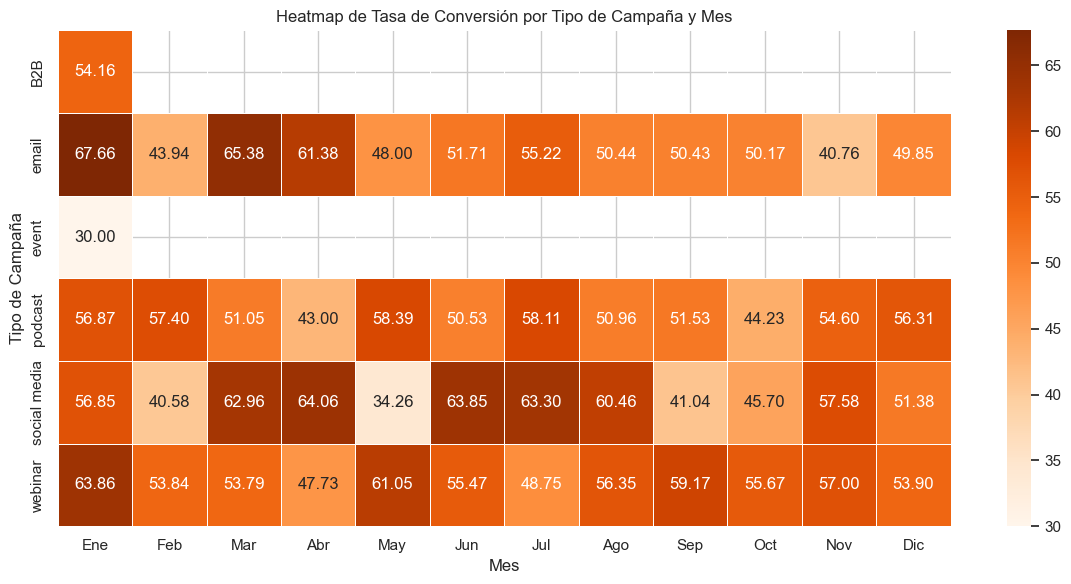

In [57]:
#2. Heatmap de tasa de conversión por mes y tipo de campaña

heatmap_conv = df.pivot_table(index='type', columns='month', values='conversion_rate', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_conv, annot=True, fmt=".2f", cmap='Oranges', linewidths=0.5)
plt.title('Heatmap de Tasa de Conversión por Tipo de Campaña y Mes')
plt.xlabel('Mes')
plt.ylabel('Tipo de Campaña')
plt.xticks(ticks=np.arange(12)+0.5, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                                            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=0)
plt.tight_layout()
plt.show()

##### 📊 Conclusión del Heatmap de Tasa de Conversión por Tipo de Campaña y Mes

Campañas más efectivas:

- Email marketing destaca en enero con la tasa de conversión más alta del año (67.66%).

- Social media también muestra altos niveles de conversión en marzo (62.96%), abril (64.06%), y junio (63.85%).

Tendencias mensuales:

- Enero y marzo parecen ser meses fuertes en general para varias campañas, probablemente por planes anuales o lanzamientos de Q1.

- Mayo y septiembre muestran caídas notables en campañas de social media y webinar, indicando posible menor interés o saturación de contenido.

Campañas con rendimiento estable:

- Podcast mantiene un rendimiento relativamente constante, destacando en julio (58.11%) y diciembre (56.31%).

- Webinar también muestra buenos resultados, especialmente en septiembre (59.17%) y noviembre (57.00%).

Campañas menos efectivas:

- La campaña “event” tiene un único valor (30.00%), lo que sugiere datos incompletos o una ejecución muy puntual.

- Algunas caídas significativas se observan en social media en mayo (34.26%) y en email en noviembre (40.76%).

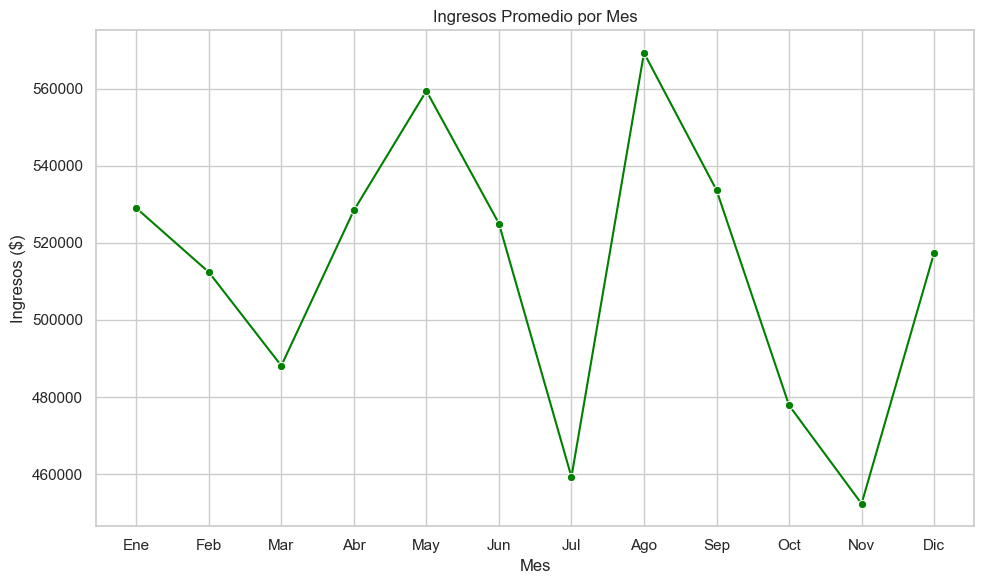

In [58]:
#3. Ingresos promedio por mes

monthly_revenue = df.groupby('month')['revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o', color='green')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
                                       'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title('Ingresos Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 💰 Conclusión del Gráfico de Ingresos Promedio por Mes

Meses con mayores ingresos:

- Agosto presenta el pico más alto del año en ingresos promedio, superando los $570,000.

- Mayo también se destaca con un ingreso cercano a los $560,000, seguido por septiembre y enero con niveles superiores a los $530,000.

Meses con menores ingresos:

- Noviembre es el mes con el ingreso promedio más bajo, con cifras por debajo de los $455,000.

- Julio también muestra una caída significativa, seguido de marzo y octubre.

Tendencias notables:

- Se observan fluctuaciones significativas mes a mes, con varios picos y valles pronunciados.

- Existe una caída abrupta entre junio y julio, seguida de una recuperación muy fuerte en agosto.

- Los ingresos tienden a disminuir en el último trimestre del año, particularmente en octubre y noviembre.


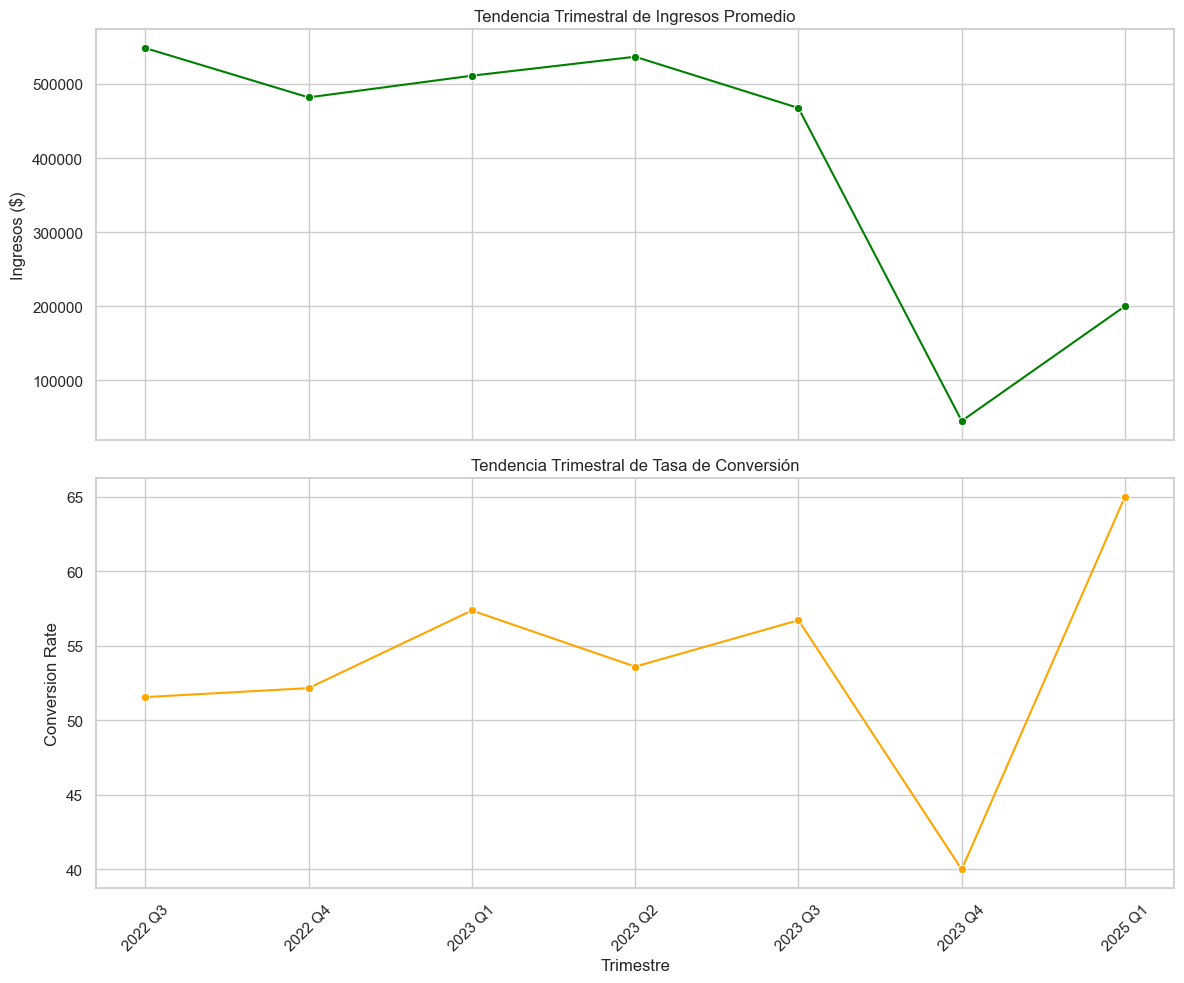

In [59]:
# 4. Tendencia trimestral de ingresos y tasa de conversión

quarterly_metrics = df.groupby(['year', 'quarter'])[['revenue', 'conversion_rate']].mean().reset_index()
quarterly_metrics['period'] = quarterly_metrics['year'].astype(str) + ' Q' + quarterly_metrics['quarter'].astype(str)

fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Ingresos
sns.lineplot(data=quarterly_metrics, x='period', y='revenue', marker='o', ax=ax[0], color='green')
ax[0].set_title('Tendencia Trimestral de Ingresos Promedio')
ax[0].set_ylabel('Ingresos ($)')
ax[0].grid(True)

# Conversion Rate
sns.lineplot(data=quarterly_metrics, x='period', y='conversion_rate', marker='o', ax=ax[1], color='orange')
ax[1].set_title('Tendencia Trimestral de Tasa de Conversión')
ax[1].set_xlabel('Trimestre')
ax[1].set_ylabel('Conversion Rate')
ax[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 📈 Conclusión de la Tendencia Trimestral de Ingresos y Conversión

1. Ingresos Promedio Trimestrales (Gráfico superior):

- 2022 Q3–2023 Q2: Se mantiene una tendencia estable, con ingresos promedio en torno a los 500,000–550,000 dólares.

- 2023 Q3: Se observa un descenso moderado.

- 2023 Q4: Ocurre una caída drástica en ingresos, alcanzando su punto más bajo (~50,000 dólares).

- 2025 Q1: Hay una recuperación parcial, subiendo a aproximadamente 200,000 dólares, aunque aún lejos de los niveles anteriores a la caída.

2. Tasa de Conversión Trimestral (Gráfico inferior):

- Tendencia general: Mayor estabilidad que los ingresos, con tasas entre 52% y 58% hasta 2023 Q3.

- 2023 Q4: Coincidiendo con la caída de ingresos, también se ve una disminución abrupta en la tasa de conversión, alcanzando ~40%, el valor más bajo del período.

- 2025 Q1: Se observa una recuperación significativa, con la tasa más alta de todo el período (~65%).

3. Relación entre ambos indicadores:

- La fuerte caída en ingresos en 2023 Q4 coincide con una baja en la tasa de conversión, lo que sugiere problemas en la efectividad de las campañas o factores externos (crisis, cambio en estrategia, etc.).

- La recuperación de conversiones en 2025 Q1 podría anticipar un repunte en ingresos futuros, aunque en este trimestre la recuperación en ingresos aún es limitada, indicando un posible desfase temporal entre conversión y monetización.

### 📊 **Conclusiones Finales del Análisis de Campañas de Marketing**

1. **Canales de Marketing y ROI**

- La distribución de canales es equilibrada: promotion (27.2%), referral (25%), organic (24.1%) y paid (23.7%).
- El canal promotion destaca con el mejor ROI, seguido por organic, mientras que referral presenta el ROI más bajo.
- La estrategia multicanal muestra ser efectiva, sin dependencia excesiva de un solo canal.

2. **Tipos de Campaña y Conversión**

- Los webinars muestran la mejor tasa de conversión (55.64%), seguidos por social media (53.96%).
- Las campañas de podcast y social media generan los mayores ingresos promedio (~529,000€).
- Los eventos presenciales muestran el rendimiento más bajo tanto en conversión como en ingresos.

3. **Distribución del ROI y Factores de Éxito**

- El ROI promedio es 0.53, con desviación estándar de 0.26.

- Los factores asociados a un ROI alto son:
    - Uso de canales orgánicos y promocionales
    - Campañas tipo podcast y social media
    - Ejecución en segundo trimestre

4. **Comparativa B2B vs B2C**

- No existen diferencias estadísticamente significativas (p-valor = 0.2775).
- B2B muestra una conversión ligeramente superior (55.02% vs 53.20%).
- La variabilidad es similar en ambos segmentos.

5. **Beneficio Neto y Características**

- "Advanced systematic complexity" lidera con 987,860€ de beneficio neto.

Características de éxito:
- Canal orgánico.
- Tipo podcast.
- ROI de 0.95.
- Conversión del 54%.

6. **Correlación Presupuesto-Ingresos**

- No existe correlación fuerte entre presupuesto e ingresos.
- La eficiencia en la asignación de recursos es más importante que el volumen de inversión.

7. **Campañas de Alto Rendimiento**

- 10 campañas superan ROI > 0.5 e ingresos > 500,000€.
- Predominan canales organic y paid.
- Destacan tipos podcast y social media.

8. **Patrones Estacionales**

- Segundo trimestre muestra el mejor rendimiento.
- Cuarto trimestre presenta caídas significativas, especialmente diciembre.
- Primer trimestre 2025 muestra recuperación notable en conversión (65%).

📌 Recomendaciones Estratégicas:

- Priorizar campañas de podcast y social media en canales orgánicos y promocionales.
- Concentrar inversiones importantes en Q2.
- Optimizar o reducir campañas en Q4.
- Mantener estrategia multicanal balanceada.
- Enfocarse en eficiencia presupuestaria más que en volumen.
- Implementar estrategias específicas para B2B y B2C según temporada.
- El éxito en marketing digital depende más de la optimización táctica y temporal que del volumen de inversión, destacando la importancia de una estrategia diversificada y bien temporizada.